## Matplotlib

In [2]:
import numpy as np
import pandas as pd

импортируем библиотеку matplotlib для построения графиков

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
pd.options.display.max_rows = 10

| Column Name        | Description
| ------------- |:-------------:|
|Symbol|Сокращенное название организации|
|Name|Полное название организации|
|Sector|Сектор экономики|
|Price|Стоимость акции|
|Dividend Yield|Дивидендная доходность|
|Price/Earnings|Цена / прибыль|
|Earnings/Share|Прибыль на акцию|
|Book Value|Балансовая стоимость компании|
|52 week low|52-недельный минимум|
|52 week high|52-недельный максимум|
|Market Cap|Рыночная капитализация|
|EBITDA|**E**arnings **b**efore **i**nterest, **t**axes, **d**epreciation and **a**mortization|
|Price/Sales|Цена / объём продаж|
|Price/Book|Цена / балансовая стоимость|
|SEC Filings|Ссылка *sec.gov*|

In [11]:
sp500 = pd.read_csv("../data/sp500.csv",
                    index_col='Symbol',
                    usecols=['Symbol', 'Sector', 'Price',
                             'Book Value', 'Market Cap',
                             'Dividend Yield'])
sp500

,Sector,Price,Dividend Yield,Book Value,Market Cap
Symbol,,,,,
MMM,Industrials,141.14,2.12,26.668,92.345
ABT,Health Care,39.60,1.82,15.573,59.477
ABBV,Health Care,53.95,3.02,2.954,85.784
ACN,Information Technology,79.79,2.34,8.326,50.513
ACE,Financials,102.91,2.21,86.897,34.753
...,...,...,...,...,...
YHOO,Information Technology,35.02,NaN,12.768,35.258
YUM,Consumer Discretionary,74.77,1.93,5.147,33.002
ZMH,Health Care,101.84,0.81,37.181,17.091


считываем исторические данные о котировках акций

In [13]:
omh = pd.read_csv('../data/omh.csv', 
                  parse_dates=['Date'])

omh.set_index('Date', 
              inplace=True)

In [15]:
omh.head()

,MSFT,AAPL
Date,,
2014-12-01,48.62,115.07
2014-12-02,48.46,114.63
2014-12-03,48.08,115.93
2014-12-04,48.84,115.49
2014-12-05,48.42,115.00


### Настройка

#### примеры


график цены акции Microsoft

<Axes: xlabel='Date'>

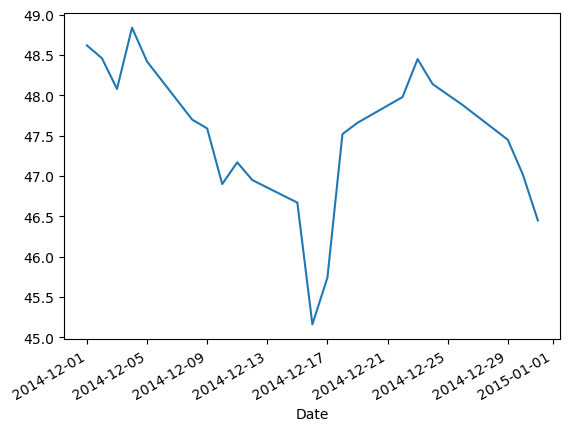

In [17]:
omh.MSFT.plot()

цена акций microsoft и apple на одном графике

<Axes: xlabel='Date'>

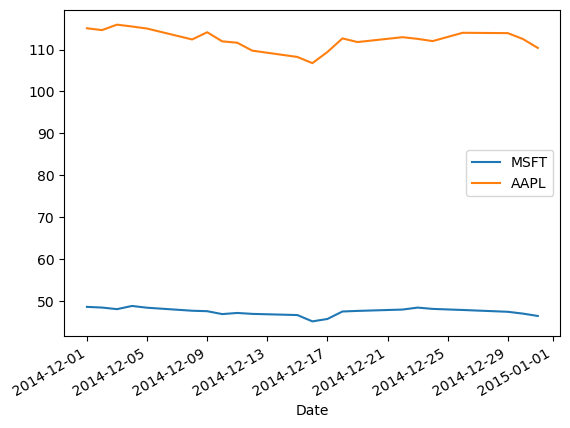

In [19]:
omh.plot()

нормализация:

<Axes: xlabel='Date'>

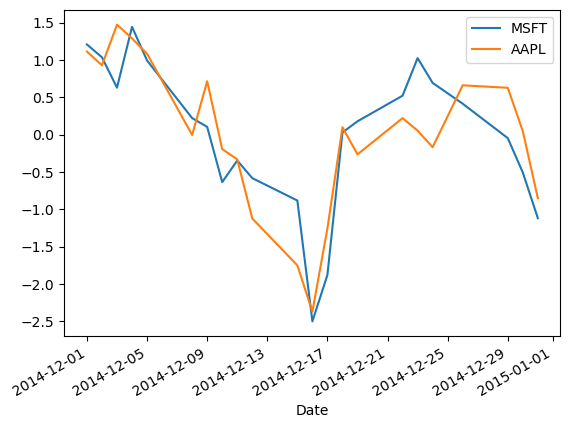

In [21]:
omh_copy =  (omh - omh.mean())/omh.std()
omh_copy.plot()

#### размер

увеличиваем размер графика

<Axes: xlabel='Date'>

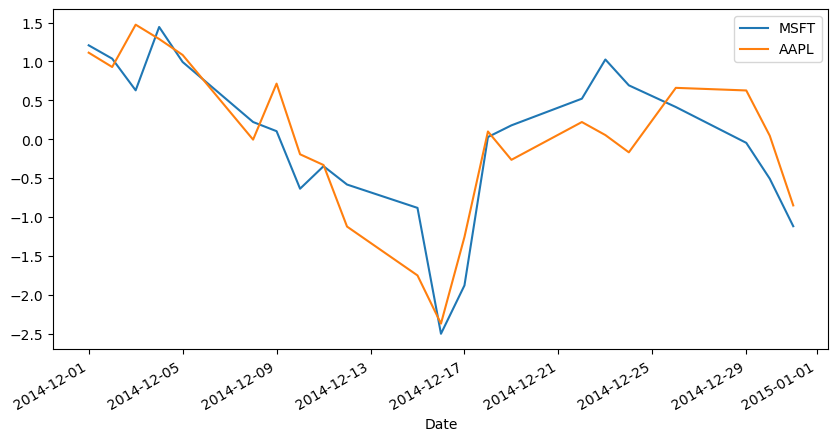

In [23]:
omh_copy.plot(figsize=(10, 5))

#### заголовок и подписи

- заголовок задаем с помощью параметра title метода .plot()
- после вызова метода .plot() явно задаем подписи осей x и y

Text(0, 0.5, 'Цена')

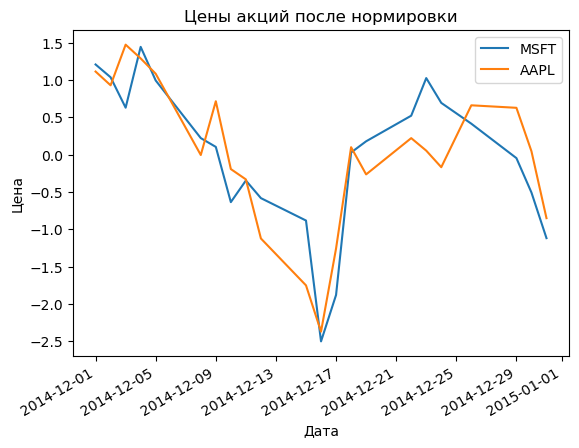

In [25]:
omh_copy.plot(title='Цены акций после нормировки')
plt.xlabel('Дата')
plt.ylabel('Цена')

#### легенда

изменяем элементы легенды, соответствующие именам столбцов датафрейма

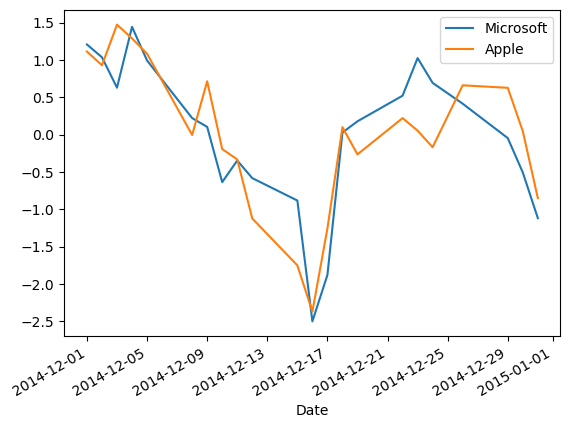

In [27]:
ax = omh_copy.plot()
ax.legend(['Microsoft', 'Apple'])

изменяем расположение легенды

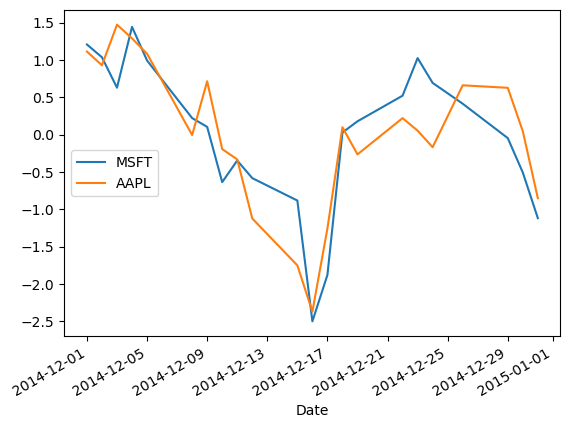

In [39]:
ax = omh_copy.plot()
ax.legend(loc=6)

отключаем легенду с помощью legend=False

<Axes: xlabel='Date'>

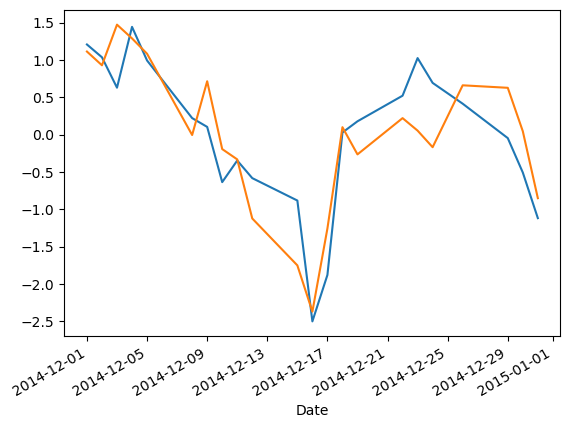

In [31]:
omh_copy.plot(legend=False)

#### цвет / стиль / толщина / маркер

меняем цвета линий графика  
[односимвольные коды](https://matplotlib.org/2.0.2/api/colors_api.html)  
[шестнадцатеричный RGB-код](https://www.rapidtables.com/web/color/RGB_Color.html)

<Axes: xlabel='Date'>

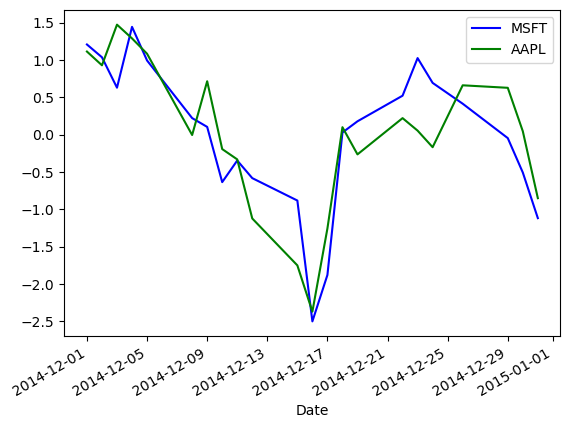

In [33]:
omh_copy.plot(style={'MSFT': '#0000FF', 'AAPL': 'g'}) 

- [различные стили линий](https://matplotlib.org/1.5.3/api/pyplot_api.html#matplotlib.pyplot.plot)  
- увеличиваем толщину линий

<Axes: xlabel='Date'>

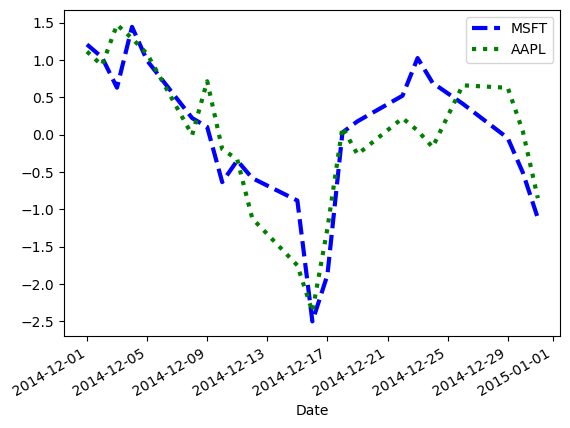

In [35]:
omh_copy.plot(style={'MSFT': 'b--', 'AAPL': 'g:'}, lw=3)

рисуем заново, добавив [маркеры](https://matplotlib.org/api/markers_api.html) линий

<Axes: xlabel='Date'>

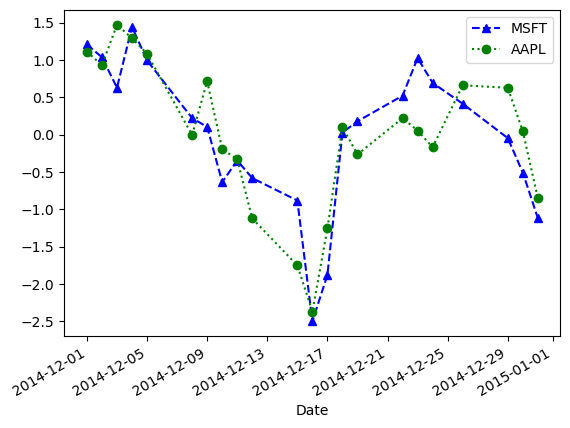

In [37]:
omh_copy.plot(style={'MSFT': 'b--^', 'AAPL': 'g:o'})

### Графики

#### bar

строим столбчатую диаграмму

<Axes: xlabel='Sector'>

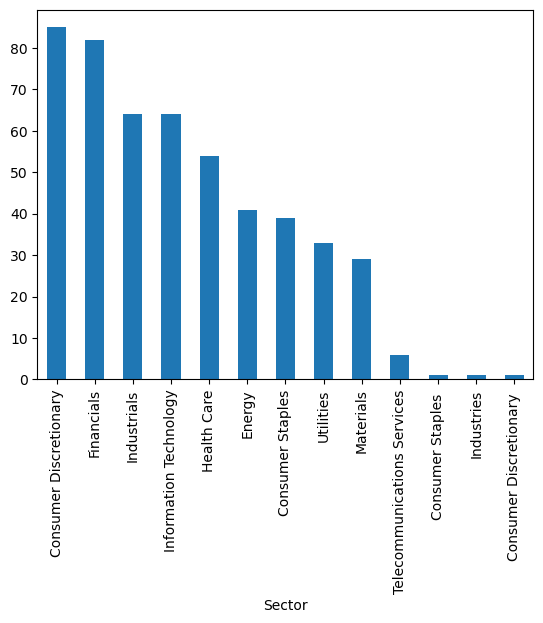

In [41]:
s = sp500.Sector.value_counts()
s.plot(kind='bar')

малочисленные сектора:

In [43]:
small_sectors = s[-4:].index.values
small_sectors

array(['Telecommunications Services', 'Consumer Staples ', 'Industries',
       'Consumer Discretionary '], dtype=object)

In [49]:
sp500_dig = sp500[['Price', 'Book Value', 'Market Cap', 'Dividend Yield']]
sp500_dig

,Price,Book Value,Market Cap,Dividend Yield
Symbol,,,,
MMM,141.14,26.668,92.345,2.12
ABT,39.60,15.573,59.477,1.82
ABBV,53.95,2.954,85.784,3.02
ACN,79.79,8.326,50.513,2.34
ACE,102.91,86.897,34.753,2.21
...,...,...,...,...
YHOO,35.02,12.768,35.258,NaN
YUM,74.77,5.147,33.002,1.93
ZMH,101.84,37.181,17.091,0.81


95% квантиль

In [51]:
sp500[['Price', 'Book Value', 'Market Cap', 'Dividend Yield']].quantile(0.95)

Price             183.8595
Book Value         66.2591
Market Cap        134.8750
Dividend Yield      4.4370
Name: 0.95, dtype: float64

создаем копию данных sp500 

In [53]:
ind = (~sp500.Sector.isin(small_sectors)) \
    & (sp500.Price < 184) \
    & (sp500['Book Value'] < 66) \
    & (sp500['Market Cap'] < 134) \
    & (sp500['Dividend Yield'] < 4.5)

In [55]:
sp500_cut = sp500.loc[ind].copy()

In [57]:
sp500_cut.shape

(348, 5)

строим столбчатую диаграмму на основе нескольких серий

<Axes: xlabel='Sector'>

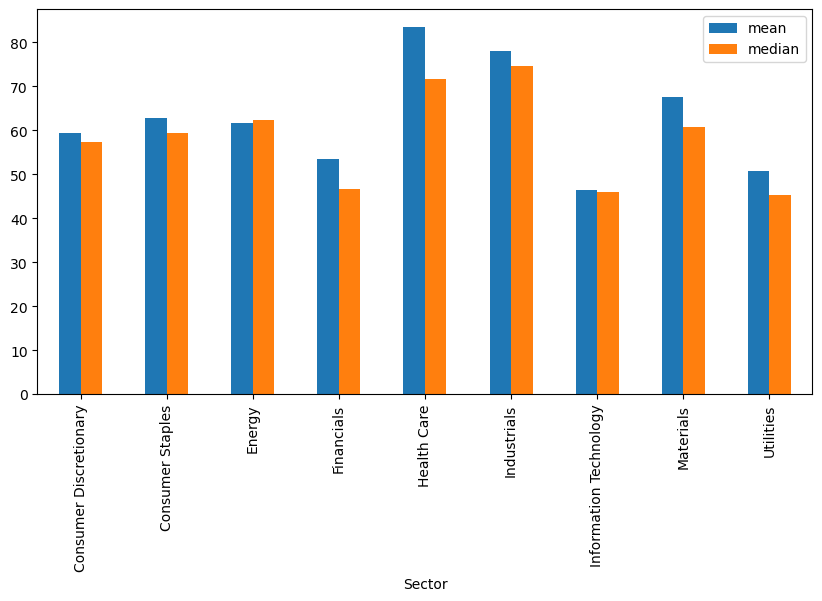

In [59]:
df = sp500_cut.groupby('Sector').Price.agg(['mean', 'median'])
df.plot(kind='bar', figsize=(10, 5))

In [61]:
df

,mean,median
Sector,,
Consumer Discretionary,59.299508,57.320
Consumer Staples,62.835313,59.325
Energy,61.662857,62.395
Financials,53.487321,46.635
Health Care,83.418966,71.640
Industrials,78.002264,74.720
Information Technology,46.380528,46.005
Materials,67.518333,60.705
Utilities,50.854483,45.230


вертикальная состыкованная столбчатая диаграмма

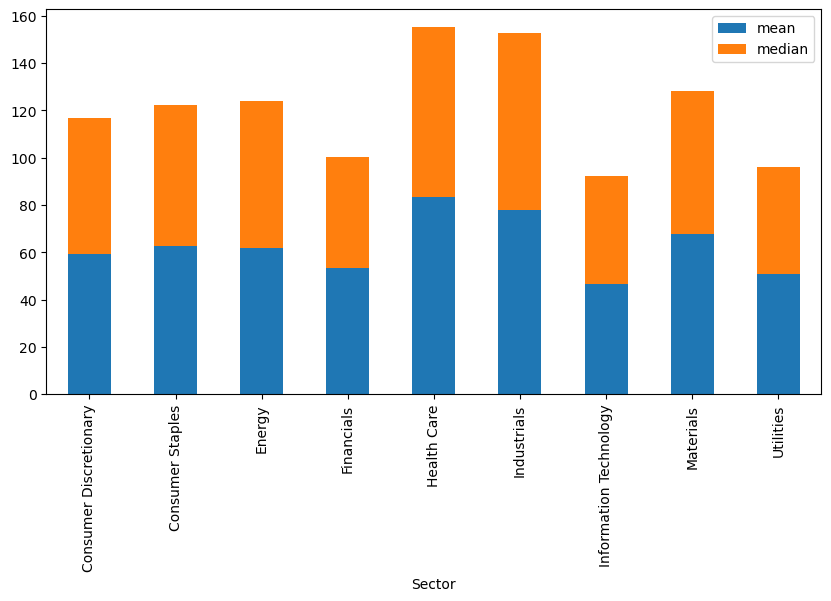

In [63]:
df.plot(kind='bar', stacked=True, figsize=(10, 5));

горизонтальная состыкованная столбиковая диаграмма

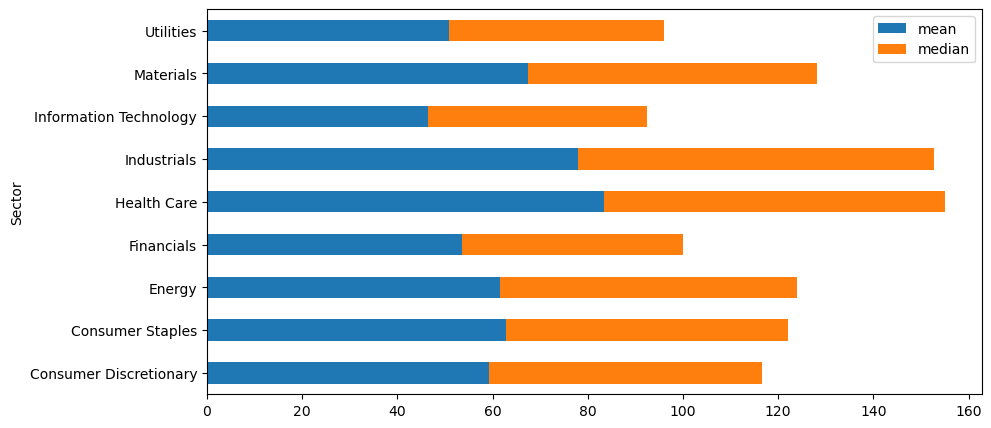

In [65]:
df.plot(kind='barh', stacked=True, figsize=(10, 5));

#### hist

строим гистограмму

<Axes: >

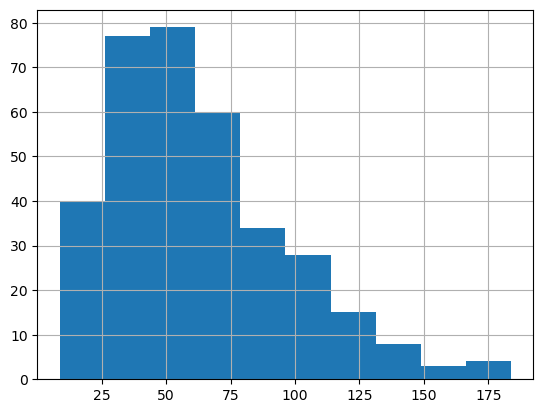

In [67]:
sp500_cut.Price.hist()

снова строим гистограмму, но теперь с большим количеством интервалов (бинов)

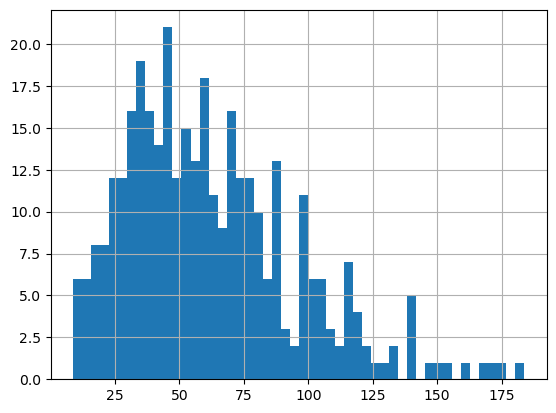

In [69]:
sp500_cut.Price.hist(bins = 50);

поскольку у нас 4 столбца, pandas строит четыре гистограммы

array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Dividend Yield'}>],
       [<Axes: title={'center': 'Book Value'}>,
        <Axes: title={'center': 'Market Cap'}>]], dtype=object)

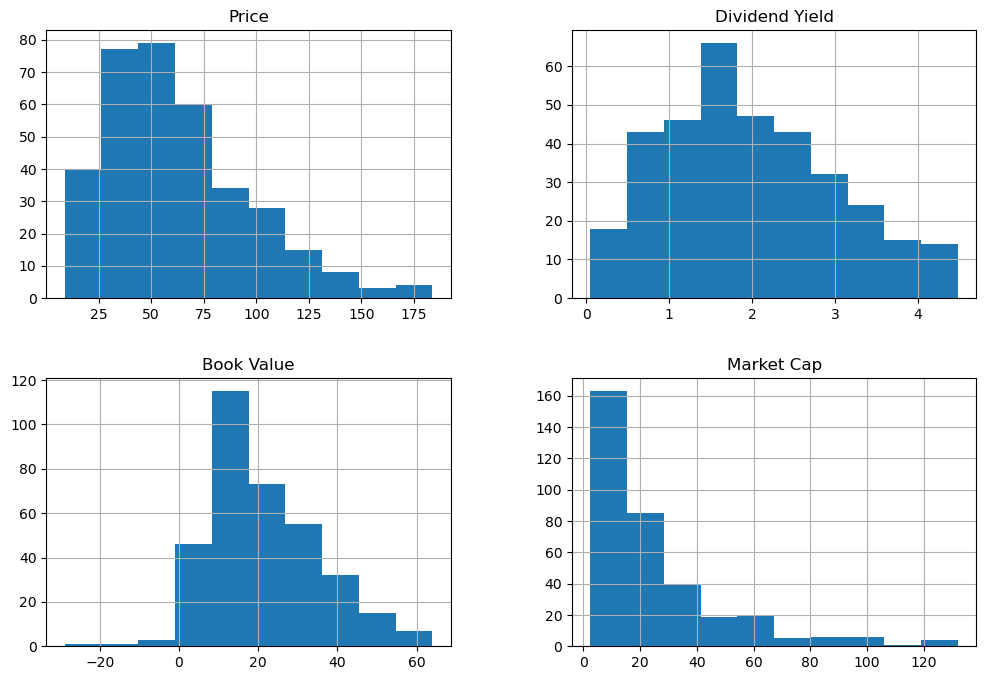

In [71]:
sp500_cut.hist(figsize=(12,8))

напрямую воспользуемся модулем pyplot  для наложения нескольких гистограмм

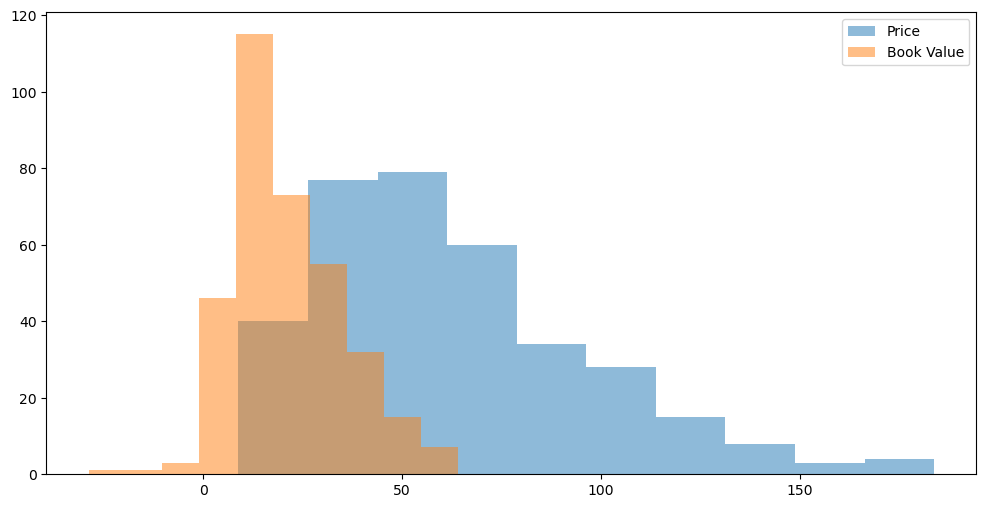

In [73]:
plt.figure(figsize=(12, 6))
plt.hist(sp500_cut.Price, alpha=0.5, label='Price')
plt.hist(sp500_cut['Book Value'], alpha=0.5, label='Book Value')
plt.legend(loc='upper right');

<Axes: ylabel='Density'>

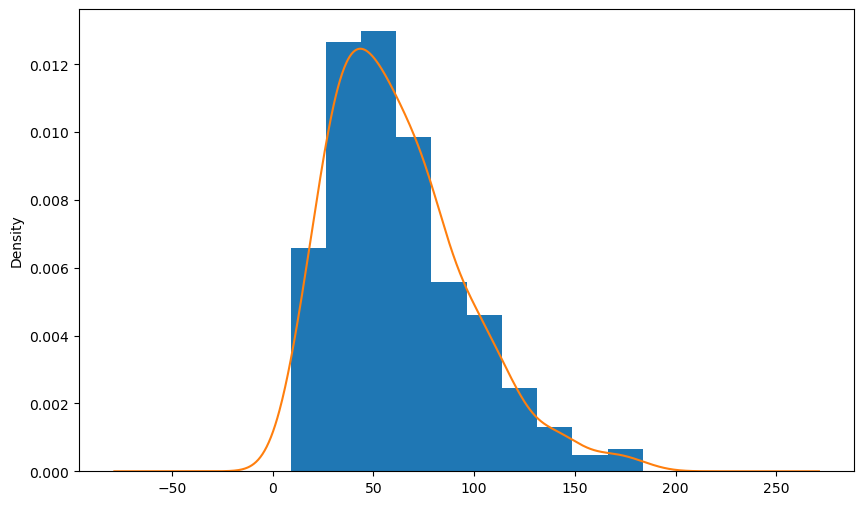

In [75]:
s = sp500_cut.Price
s.hist(density=True)
s.plot(kind='kde', figsize=(10,6))

#### box

<Axes: >

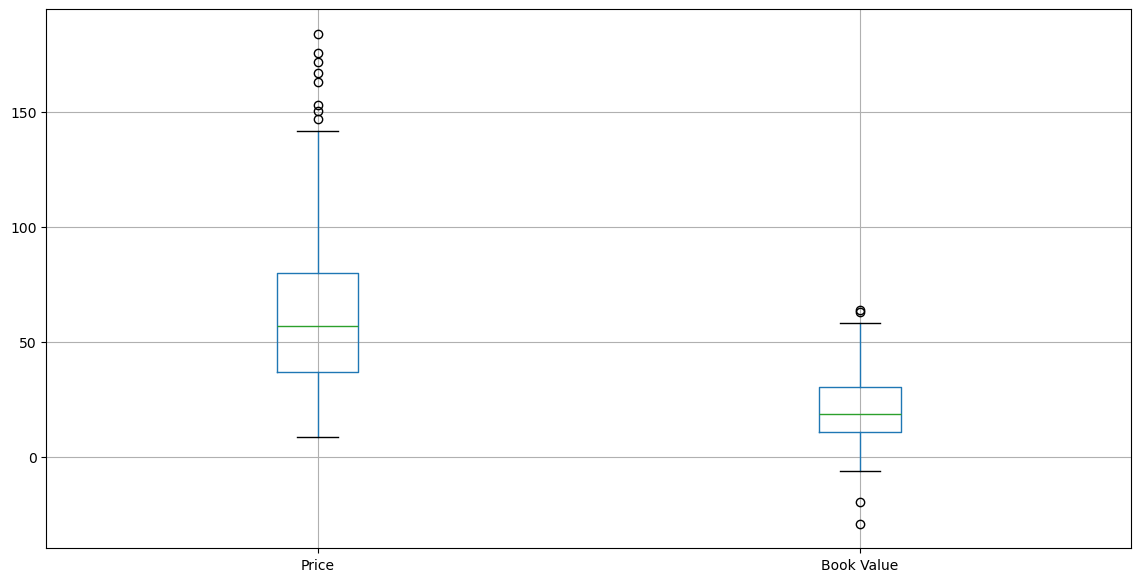

In [77]:
sp500_cut[['Price','Book Value']].boxplot(figsize = (14, 7))

#### scatter

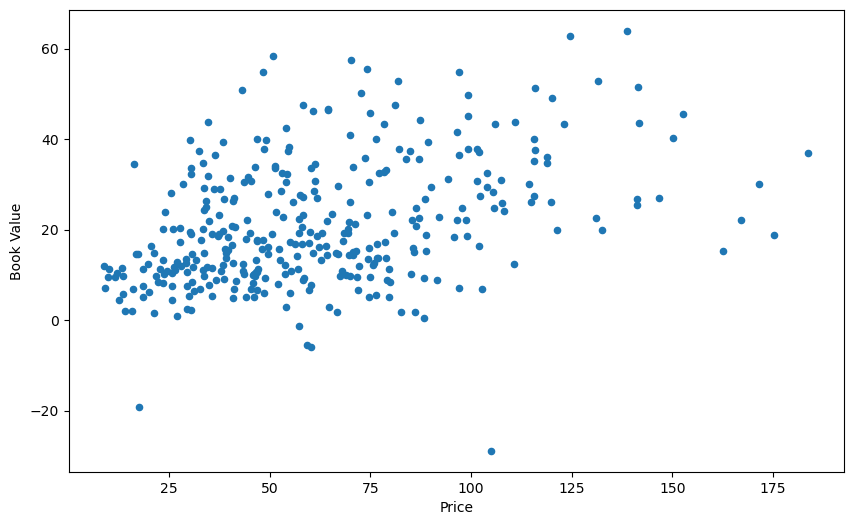

In [79]:
sp500_cut.plot(kind='scatter', x='Price', y='Book Value', figsize=(10, 6));

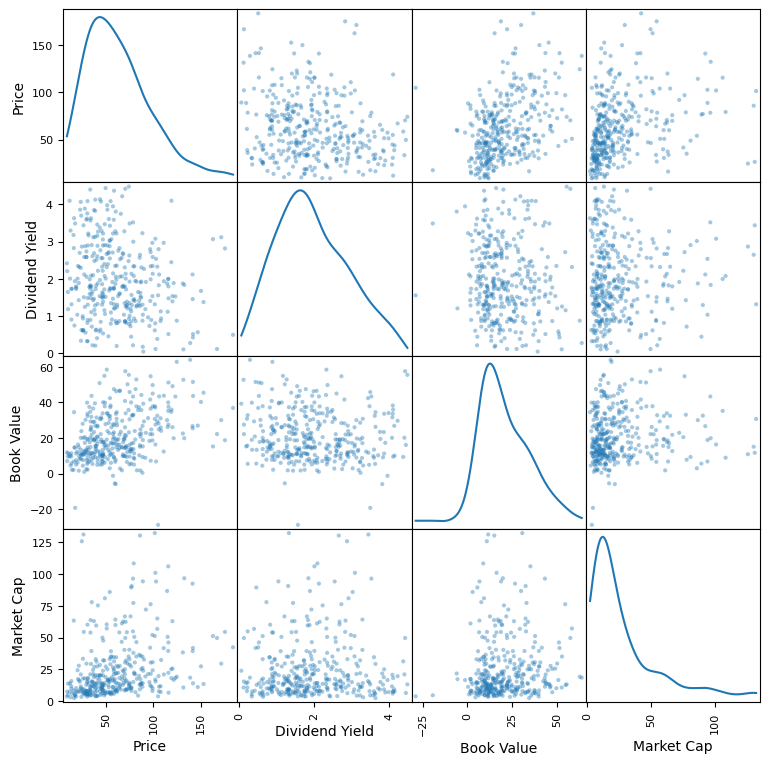

In [81]:
from pandas.plotting import scatter_matrix
scatter_matrix(sp500_cut, alpha=0.4, figsize=(9, 9), diagonal='kde');

#### heat map

In [85]:
corr_matrix = sp500_cut[['Price', 'Book Value', 'Market Cap', 'Dividend Yield']].corr()
corr_matrix

,Price,Book Value,Market Cap,Dividend Yield
Price,1.000000,0.400478,0.300704,-0.198063
Book Value,0.400478,1.000000,0.069702,-0.094121
Market Cap,0.300704,0.069702,1.000000,0.019838
Dividend Yield,-0.198063,-0.094121,0.019838,1.000000


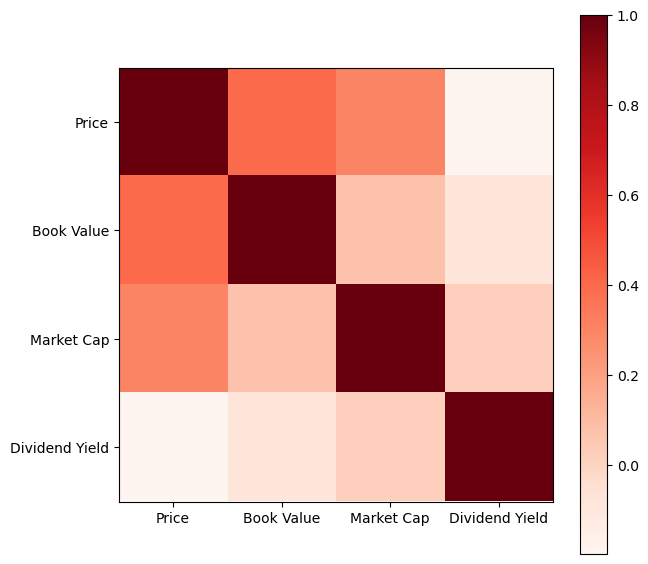

In [91]:
plt.figure(figsize=(7, 7))
plt.imshow(corr_matrix, cmap='Reds')
plt.colorbar()  # добавим шкалу интенсивности цвета

plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.yticks(range(len(corr_matrix)), corr_matrix.index);

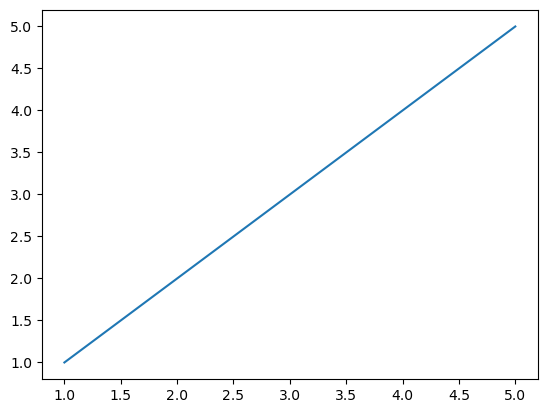

In [93]:
plt.plot([1, 2, 3, 4, 5], [1, 2, 3, 4, 5])
plt.show()

In [103]:
x = np.linspace(0, 10, 50)
y = x

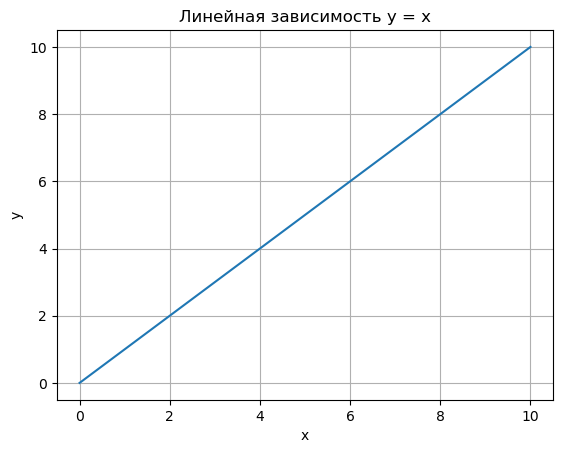

In [105]:
plt.title('Линейная зависимость y = x') # заголовок
plt.xlabel('x') # ось абсцисс
plt.ylabel('y') # ось ординат
plt.grid() # включение отображение сетки
plt.plot(x, y) 

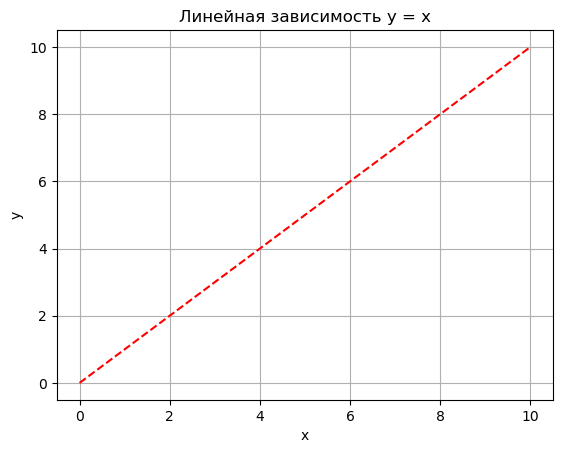

In [107]:
plt.title('Линейная зависимость y = x') # заголовок
plt.xlabel('x') # ось абсцисс
plt.ylabel('y') # ось ординат
plt.grid() # включение отображение сетки
plt.plot(x, y, 'r--') # построение графика

In [113]:
x = np.linspace(0, 10, 50)
y1 = x
y2 = [i**2 for i in x]

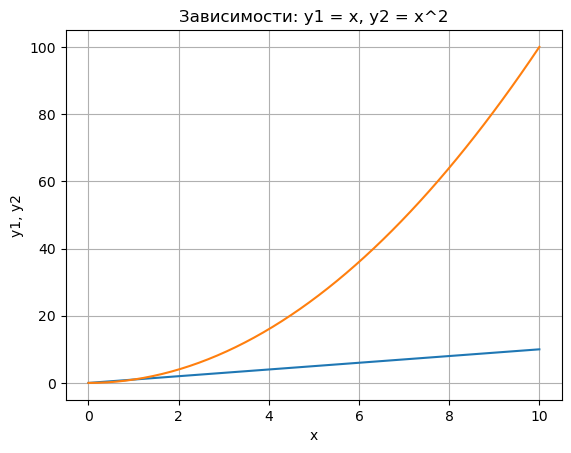

In [115]:
plt.title('Зависимости: y1 = x, y2 = x^2') # заголовок
plt.xlabel('x') # ось абсцисс
plt.ylabel('y1, y2') # ось ординат
plt.grid() # включение отображение сетки
plt.plot(x, y1, x, y2) #

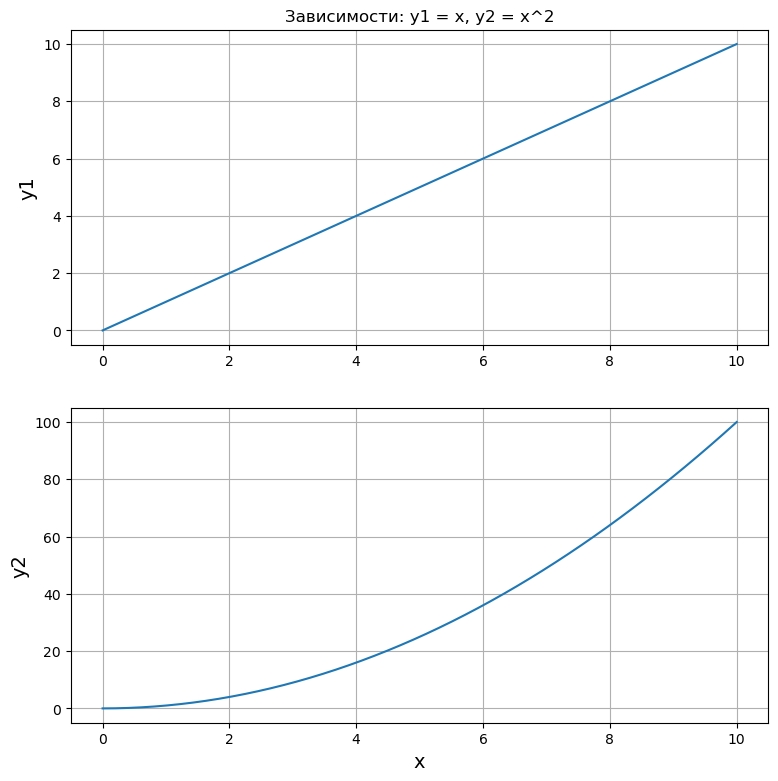

In [119]:
plt.figure(figsize=(9, 9))

plt.subplot(2, 1, 1)
plt.plot(x, y1) # построение графика
plt.title('Зависимости: y1 = x, y2 = x^2') # заголовок
plt.ylabel('y1', fontsize=14) # ось ординат
plt.grid(True) # включение отображение сетки

plt.subplot(2, 1, 2)
plt.plot(x, y2) # построение графика
plt.xlabel('x', fontsize=14) # ось абсцисс
plt.ylabel('y2', fontsize=14) # ось ординат
plt.grid(True)

Text(0, 0.5, 'Count')

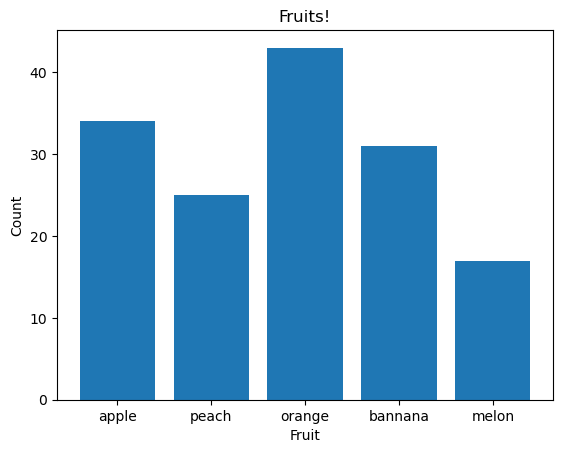

In [121]:
fruits = ['apple', 'peach', 'orange', 'bannana', 'melon']
counts = [34, 25, 43, 31, 17]
plt.bar(fruits, counts)
plt.title('Fruits!')
plt.xlabel('Fruit')
plt.ylabel('Count')


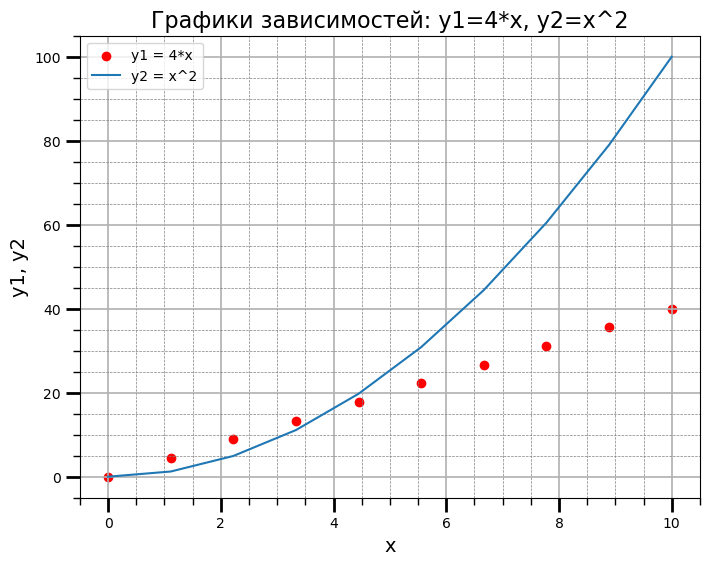

In [123]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
AutoMinorLocator)
import numpy as np
x = np.linspace(0, 10, 10)
y1 = 4*x
y2 = [i**2 for i in x]
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Графики зависимостей: y1=4*x, y2=x^2', fontsize=16)
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y1, y2', fontsize=14)
ax.grid(which='major', linewidth=1.2)
ax.grid(which='minor', linestyle='--', color='gray', linewidth=0.5)
ax.scatter(x, y1, c='red', label='y1 = 4*x')
ax.plot(x, y2, label='y2 = x^2')
ax.legend()
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='major', length=10, width=2)
ax.tick_params(which='minor', length=5, width=1)
plt.show()

[]

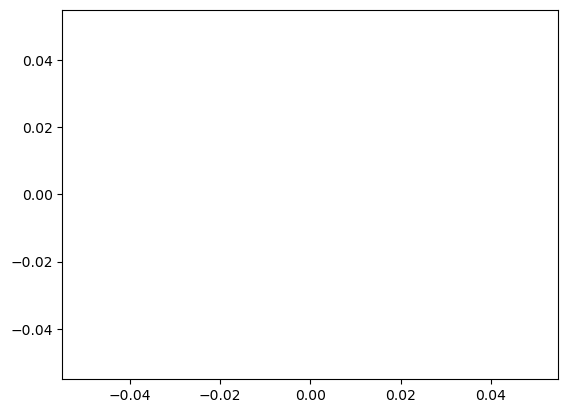

In [131]:

plt.plot()

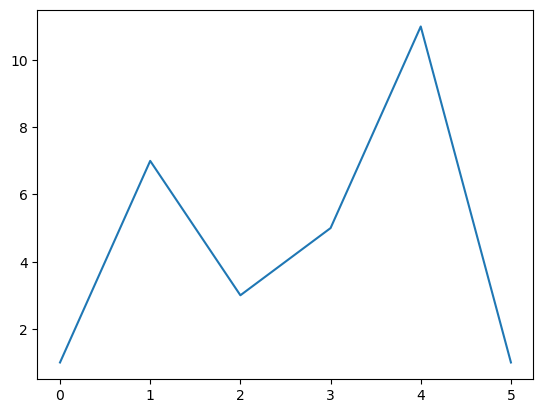

In [133]:
plt.plot([1, 7, 3, 5, 11, 1])


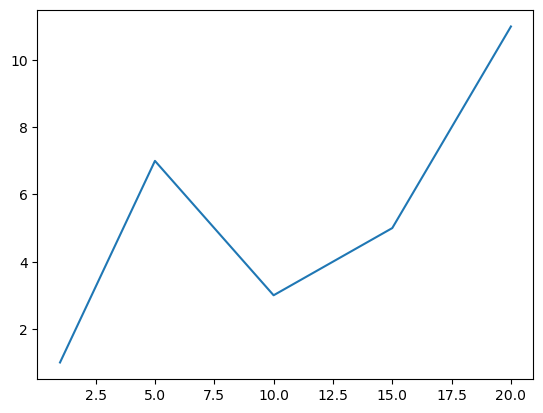

In [135]:
plt.plot([1, 5, 10, 15, 20], [1, 7, 3, 5, 11])

Text(15, 4, 'grow up!')

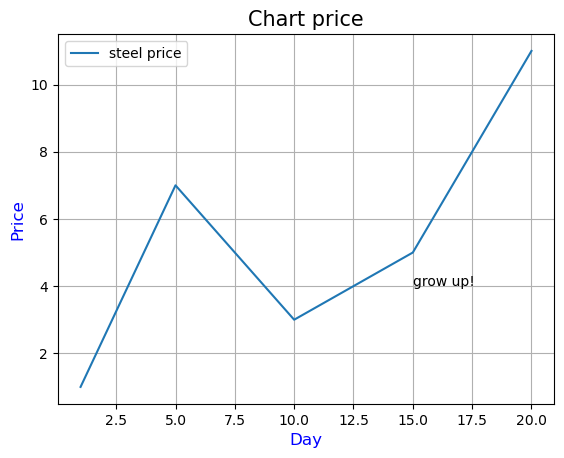

In [169]:
x = [1, 5, 10, 15, 20]
y = [1, 7, 3, 5, 11]
plt.plot(x, y, label='steel price')
plt.title('Chart price', fontsize=15)
plt.xlabel('Day', fontsize=12, color='blue')
plt.ylabel('Price', fontsize=12, color='blue')
plt.legend()
plt.grid(True)
plt.text(15, 4, 'grow up!')

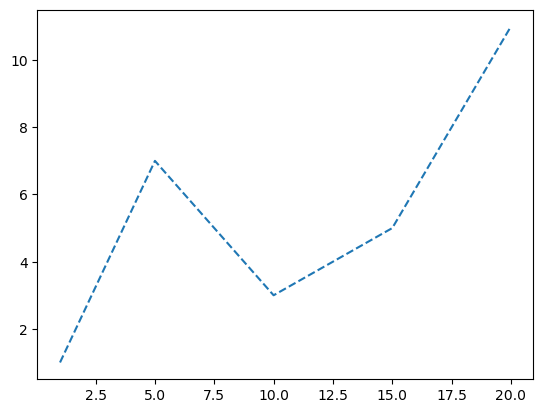

In [143]:
x = [1, 5, 10, 15, 20]
y = [1, 7, 3, 5, 11]
plt.plot(x, y, '--')

[None]

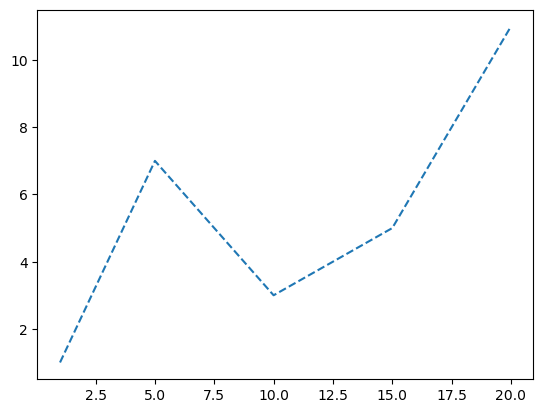

In [145]:
x = [1, 5, 10, 15, 20]
y = [1, 7, 3, 5, 11]
line = plt.plot(x, y)
plt.setp(line, linestyle='--')

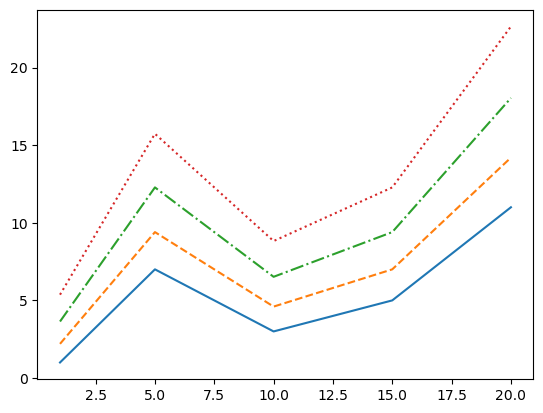

In [147]:
x = [1, 5, 10, 15, 20]
y1 = [1, 7, 3, 5, 11]
y2 = [i*1.2 + 1 for i in y1]
y3 = [i*1.2 + 1 for i in y2]
y4 = [i*1.2 + 1 for i in y3]
plt.plot(x, y1, '-', x, y2, '--', x, y3, '-.', x, y4, ':')

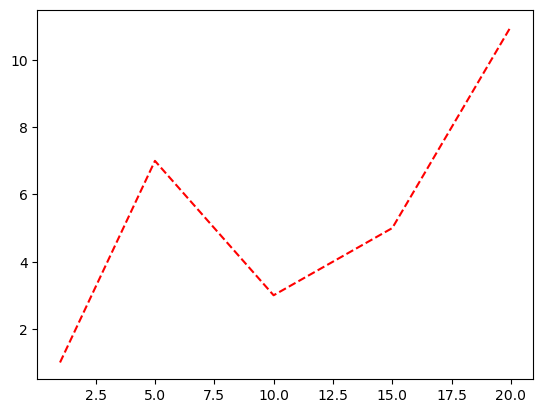

In [149]:
x = [1, 5, 10, 15, 20]
y = [1, 7, 3, 5, 11]
plt.plot(x, y, '--r')

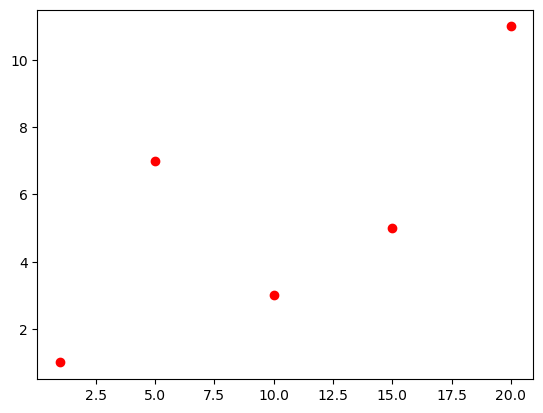

In [151]:
plt.plot(x, y, 'ro')


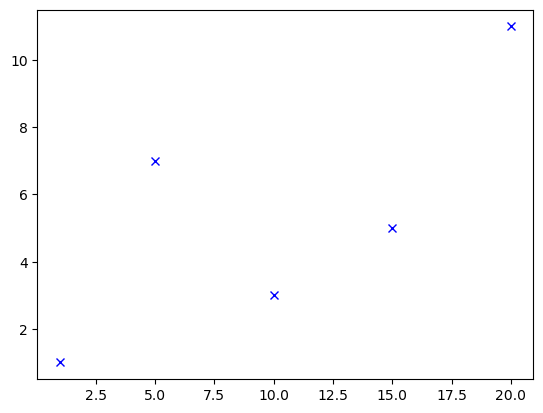

In [153]:
plt.plot(x, y, 'bx')

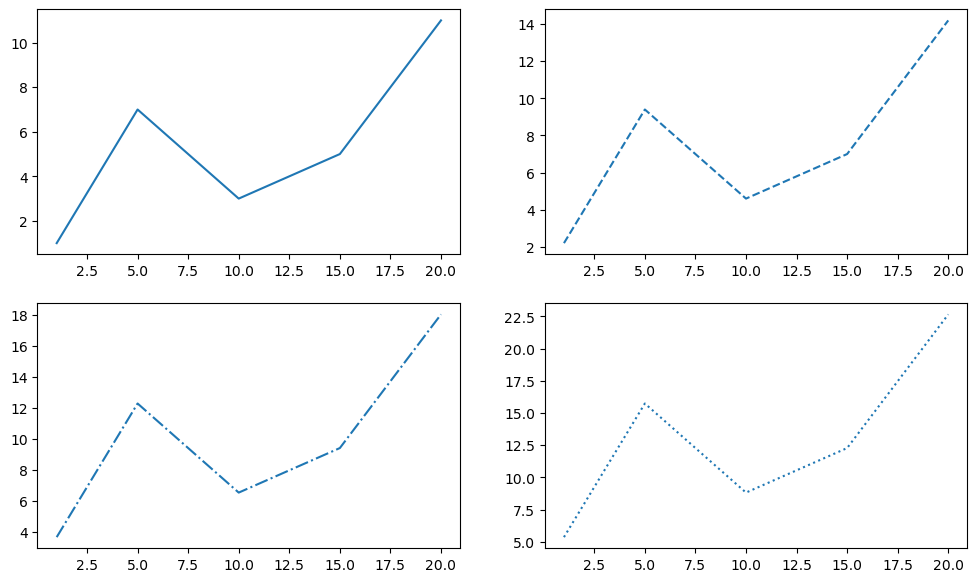

In [161]:
x = [1, 5, 10, 15, 20]
y1 = [1, 7, 3, 5, 11]
y2 = [i*1.2 + 1 for i in y1]
y3 = [i*1.2 + 1 for i in y2]
y4 = [i*1.2 + 1 for i in y3]
# Настройка размеров подложки
plt.figure(figsize=(12, 7))
33
# Вывод графиков
plt.subplot(221)
plt.plot(x, y1, '-')
plt.subplot(222)
plt.plot(x, y2, '--')
plt.subplot(223)
plt.plot(x, y3, '-.')
plt.subplot(224)
plt.plot(x, y4, ':')


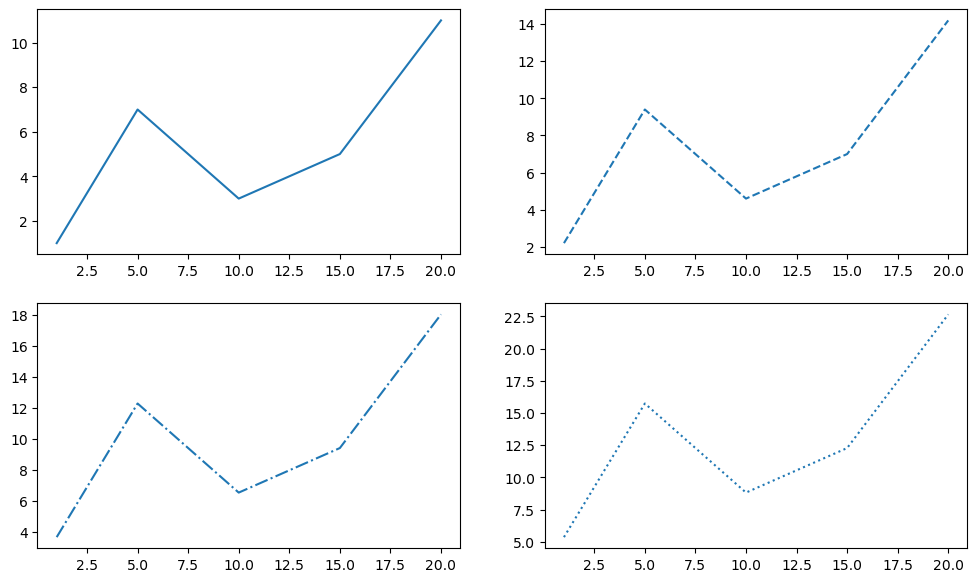

In [163]:
fig, axs = plt.subplots(2, 2, figsize=(12, 7))
axs[0, 0].plot(x, y1, '-')
axs[0, 1].plot(x, y2, '--')
axs[1, 0].plot(x, y3, '-.')
axs[1, 1].plot(x, y4, ':')

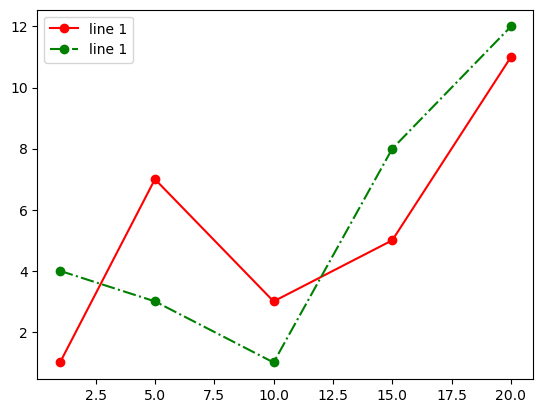

In [171]:
x = [1, 5, 10, 15, 20]
y1 = [1, 7, 3, 5, 11]
y2 = [4, 3, 1, 8, 12]
plt.plot(x, y1, 'o-r', label='line 1')
plt.plot(x, y2, 'o-.g', label='line 1')
plt.legend()

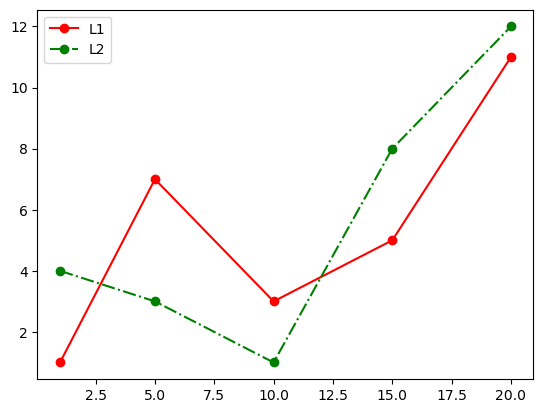

In [173]:
plt.plot(x, y1, 'o-r')
plt.plot(x, y2, 'o-.g')
plt.legend(['L1', 'L2'])

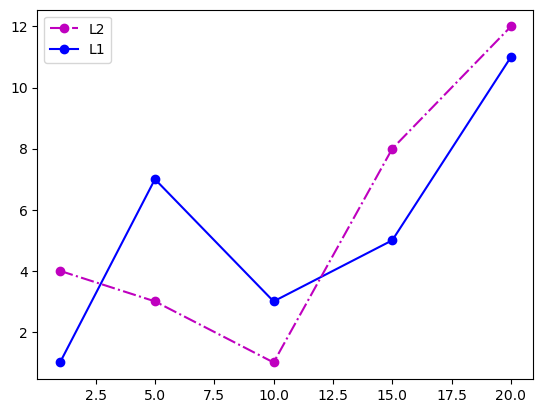

In [175]:
line1, = plt.plot(x, y1, 'o-b')
line2, = plt.plot(x, y2, 'o-.m')
plt.legend((line2, line1), ['L2', 'L1'])


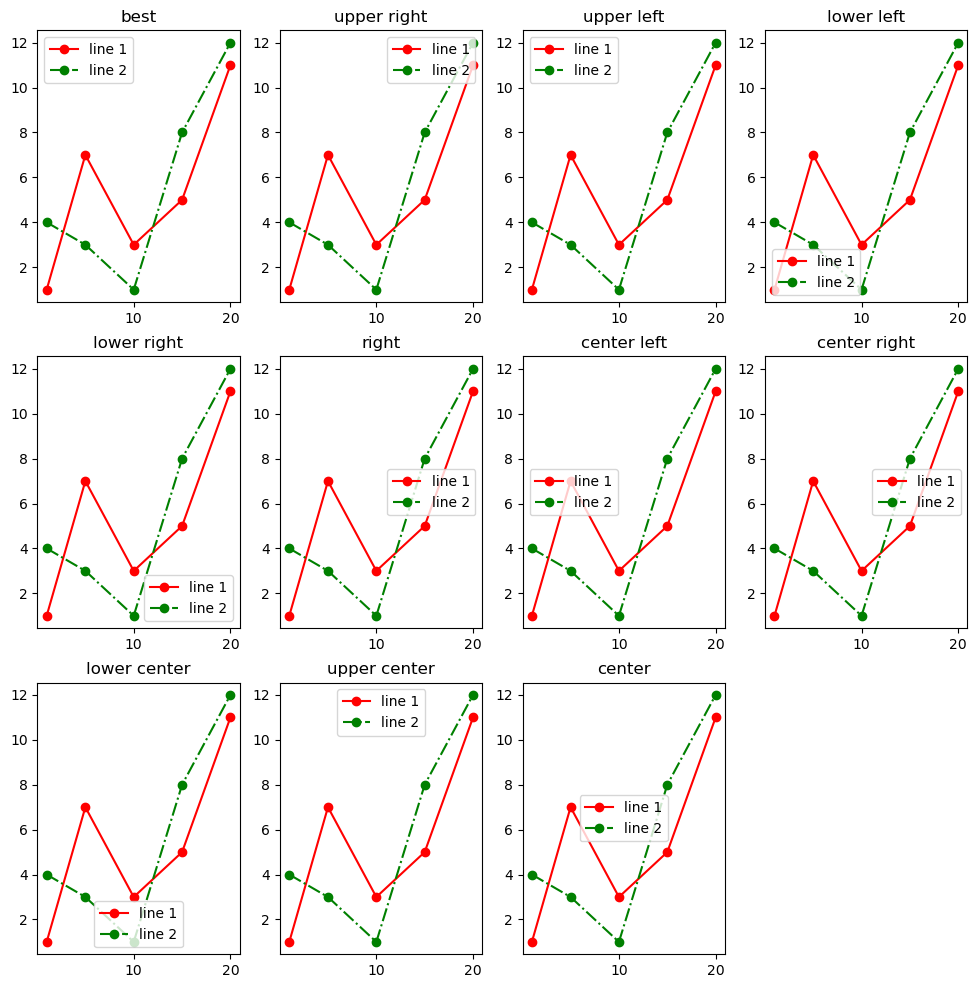

In [200]:
locs = ['best', 'upper right', 'upper left', 'lower left',
 'lower right', 'right', 'center left', 'center right',
 'lower center', 'upper center', 'center']
plt.figure(figsize=(12, 12))
for i in range(3):
    for j in range(4):
        if i*4+j < 11:
            plt.subplot(3, 4, i*4+j+1)
            plt.title(locs[i*4+j])
            plt.plot(x, y1, 'o-r', label='line 1')
            plt.plot(x, y2, 'o-.g', label='line 2')
            plt.legend(loc=locs[i*4+j])
         


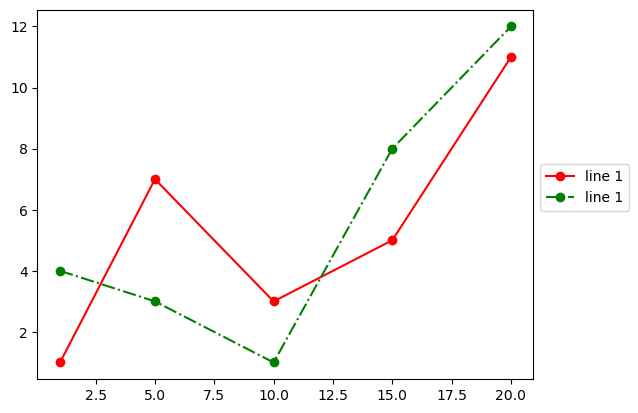

In [202]:
plt.plot(x, y1, 'o-r', label='line 1')
plt.plot(x, y2, 'o-.g', label='line 1')
plt.legend(bbox_to_anchor=(1, 0.6))

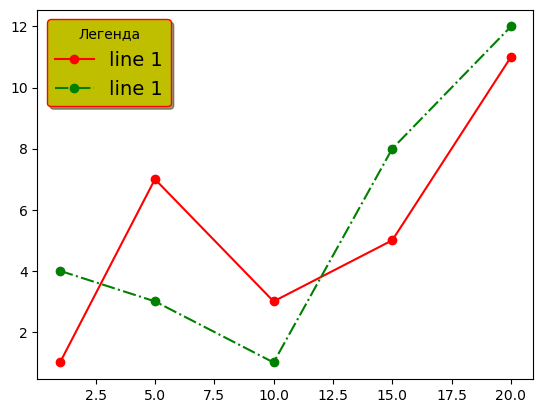

In [204]:
plt.plot(x, y1, 'o-r', label='line 1')
plt.plot(x, y2, 'o-.g', label='line 1')
plt.legend(fontsize=14, shadow=True, framealpha=1, facecolor='y',
edgecolor='r', title='Легенда')

In [206]:
import matplotlib.gridspec as gridspec

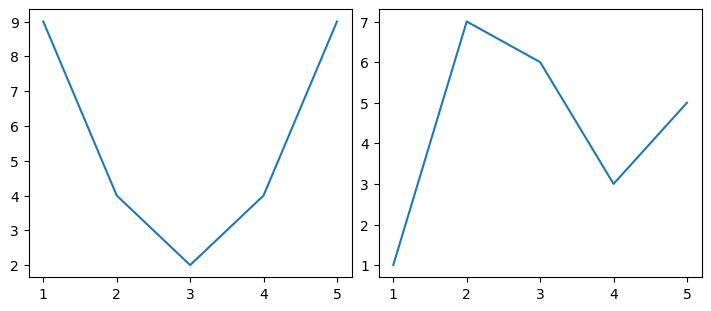

In [208]:
x = [1, 2, 3, 4, 5]
y1 = [9, 4, 2, 4, 9]
y2 = [1, 7, 6, 3, 5]
fg = plt.figure(figsize=(7, 3), constrained_layout=True)
gs = gridspec.GridSpec(ncols=2, nrows=1, figure=fg)
fig_ax_1 = fg.add_subplot(gs[0, 0])
plt.plot(x, y1)
fig_ax_2 = fg.add_subplot(gs[0, 1])
plt.plot(x, y2)


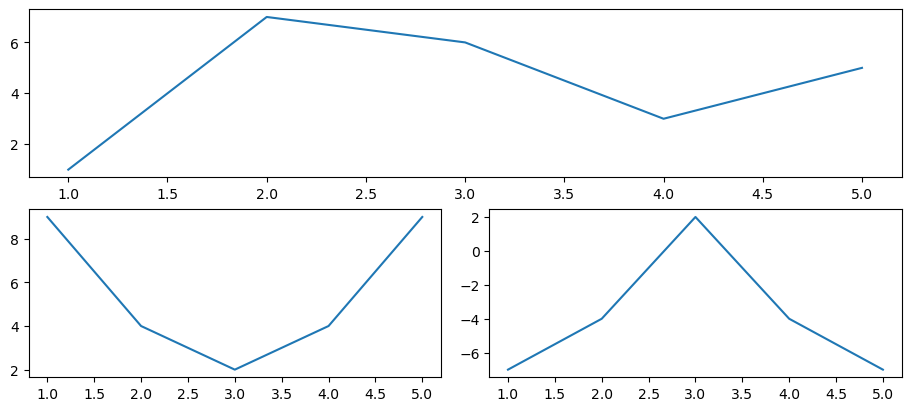

In [210]:
x = [1, 2, 3, 4, 5]
y1 = [9, 4, 2, 4, 9]
y2 = [1, 7, 6, 3, 5]
y3 = [-7, -4, 2, -4, -7]
45
#Построим графики в новой компоновке:
fg = plt.figure(figsize=(9, 4), constrained_layout=True)
gs = fg.add_gridspec(2, 2)
fig_ax_1 = fg.add_subplot(gs[0, :])
plt.plot(x, y2)
fig_ax_2 = fg.add_subplot(gs[1, 0])
plt.plot(x, y1)
fig_ax_3 = fg.add_subplot(gs[1, 1])
plt.plot(x, y3)


Text(0.5, 1.0, 'gs[4, 3:]')

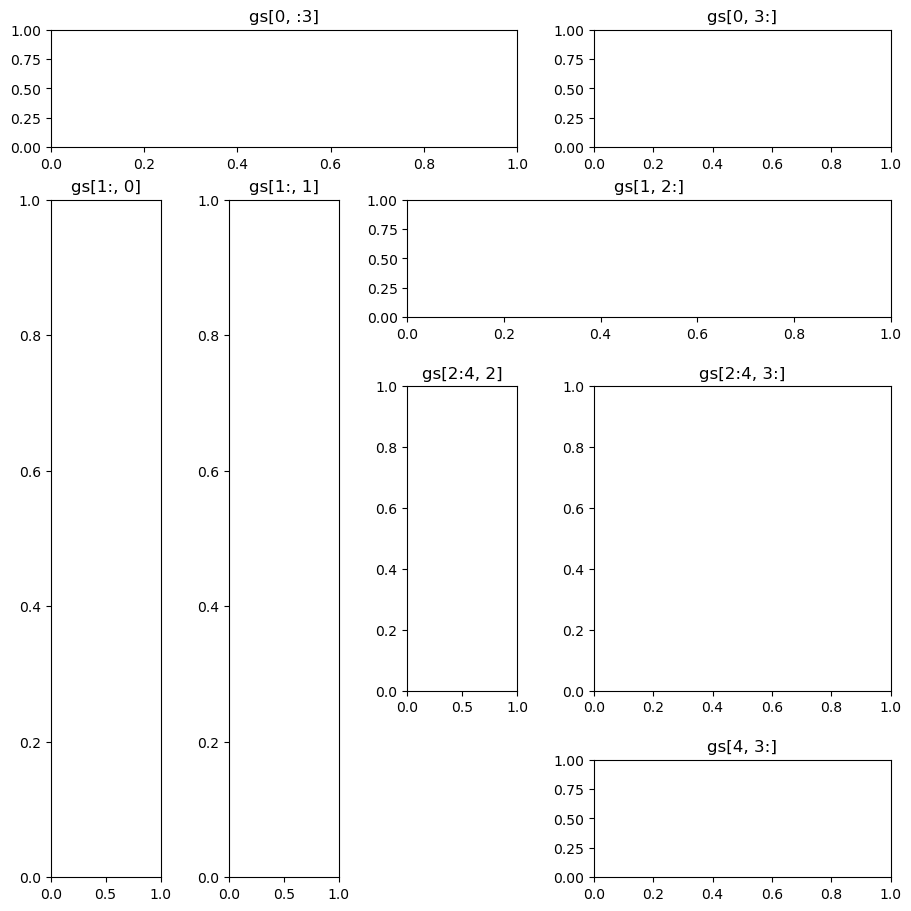

In [212]:
fg = plt.figure(figsize=(9, 9), constrained_layout=True)
gs = fg.add_gridspec(5, 5)
fig_ax_1 = fg.add_subplot(gs[0, :3])
fig_ax_1.set_title('gs[0, :3]')
fig_ax_2 = fg.add_subplot(gs[0, 3:])
fig_ax_2.set_title('gs[0, 3:]')
fig_ax_3 = fg.add_subplot(gs[1:, 0])
fig_ax_3.set_title('gs[1:, 0]')
46
fig_ax_4 = fg.add_subplot(gs[1:, 1])
fig_ax_4.set_title('gs[1:, 1]')
fig_ax_5 = fg.add_subplot(gs[1, 2:])
fig_ax_5.set_title('gs[1, 2:]')
fig_ax_6 = fg.add_subplot(gs[2:4, 2])
fig_ax_6.set_title('gs[2:4, 2]')
fig_ax_7 = fg.add_subplot(gs[2:4, 3:])
fig_ax_7.set_title('gs[2:4, 3:]')
fig_ax_8 = fg.add_subplot(gs[4, 3:])
fig_ax_8.set_title('gs[4, 3:]')


Text(0.5, 1.0, 'w:3, h:0.7')

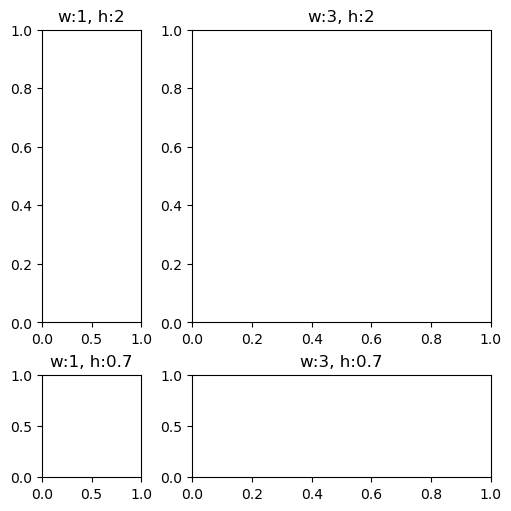

In [214]:
fg = plt.figure(figsize=(5, 5),constrained_layout=True)
widths = [1, 3]
heights = [2, 0.7]
gs = fg.add_gridspec(ncols=2, nrows=2, width_ratios=widths,
height_ratios=heights)
fig_ax_1 = fg.add_subplot(gs[0, 0])
fig_ax_1.set_title('w:1, h:2')
fig_ax_2 = fg.add_subplot(gs[0, 1])
fig_ax_2.set_title('w:3, h:2')
fig_ax_3 = fg.add_subplot(gs[1, 0])
fig_ax_3.set_title('w:1, h:0.7')
fig_ax_4 = fg.add_subplot(gs[1, 1])
fig_ax_4.set_title('w:3, h:0.7')


Text(0.5, 0.5, 'text')

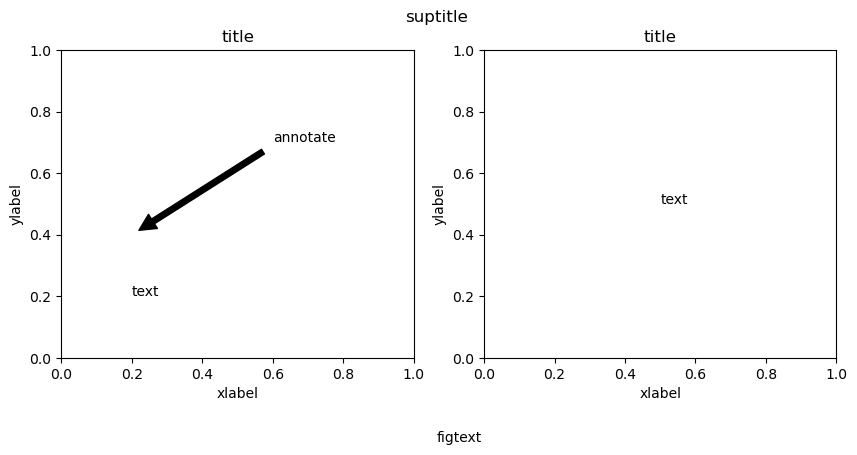

In [218]:
plt.figure(figsize=(10,4))
plt.figtext(0.5, -0.1, 'figtext')
plt.suptitle('suptitle')
plt.subplot(121)
plt.title('title')
plt.xlabel('xlabel')
plt.ylabel('ylabel')
plt.text(0.2, 0.2, 'text')
plt.annotate('annotate', xy=(0.2, 0.4), xytext=(0.6, 0.7),
arrowprops=dict(facecolor='black', shrink=0.05))

plt.subplot(122)
plt.title('title')
plt.xlabel('xlabel')
plt.ylabel('ylabel')
plt.text(0.5, 0.5, 'text')

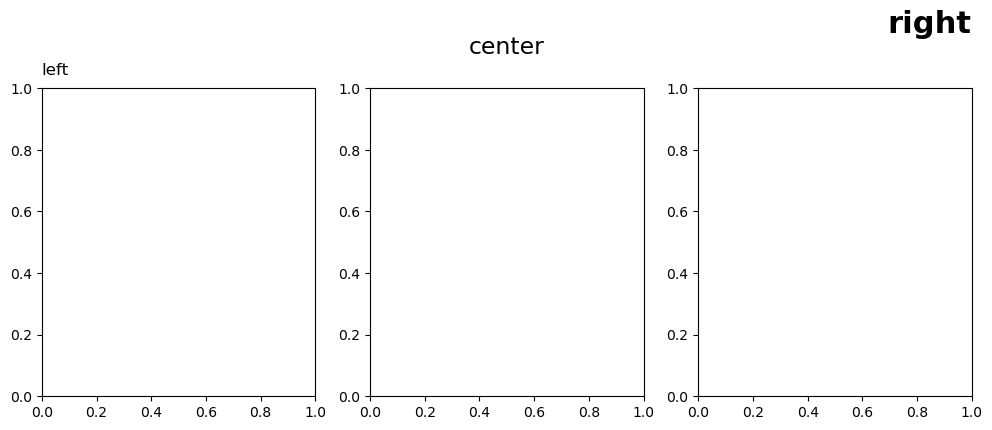

In [220]:
weight=['light', 'regular', 'bold']
plt.figure(figsize=(12, 4))
for i, lc in enumerate(['left', 'center', 'right']):
    plt.subplot(1, 3, i+1)
    plt.title(label=lc, loc=lc, fontsize=12+i*5, fontweight=weight[i],
pad=10+i*15)

Text(0, 0.5, 'Ось Y\nЗависимая величина')

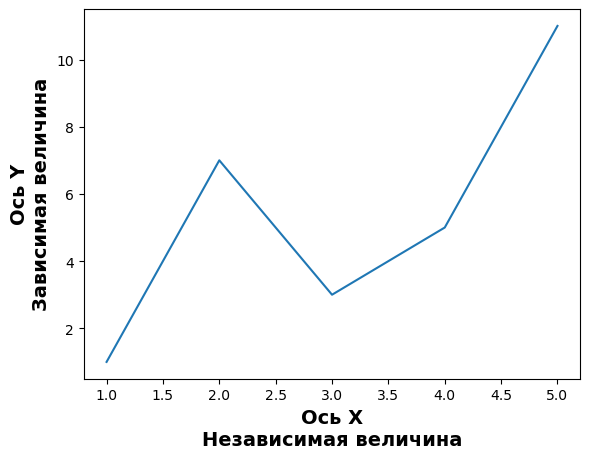

In [222]:
plt.plot(x, y)
plt.xlabel('Ось X\nНезависимая величина', fontsize=14, fontweight='bold')
plt.ylabel('Ось Y\nЗависимая величина', fontsize=14, fontweight='bold')


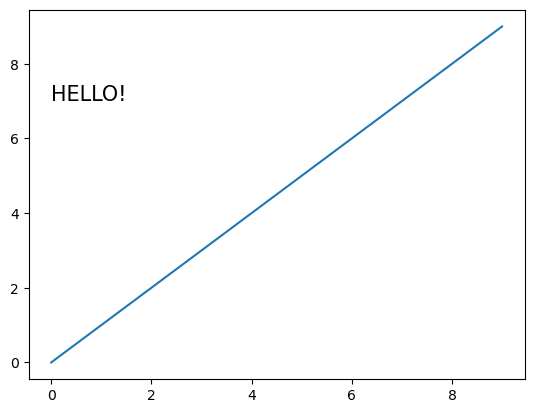

In [224]:
plt.text(0, 7, 'HELLO!', fontsize=15)
plt.plot(range(0,10), range(0,10))


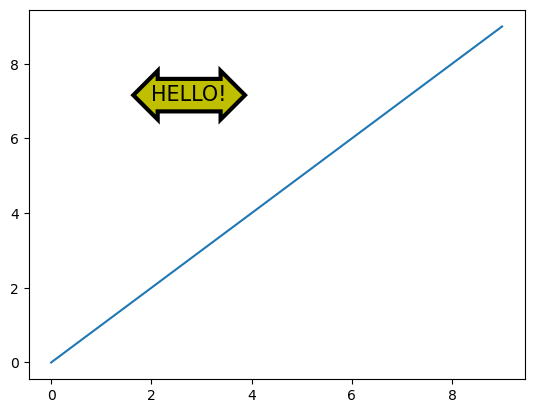

In [226]:
bbox_properties=dict(boxstyle='darrow, pad=0.3', ec='k', fc='y', ls='-',
lw=3)
plt.text(2, 7, 'HELLO!', fontsize=15, bbox=bbox_properties)
plt.plot(range(0,10), range(0,10))

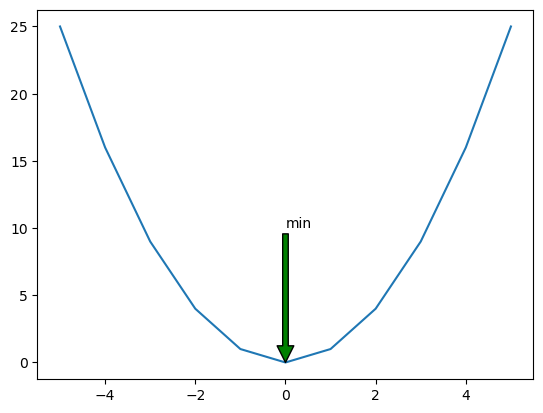

In [228]:
import math
x = list(range(-5, 6))
y = [i**2 for i in x]
plt.annotate('min', xy=(0, 0), xycoords='data', xytext=(0, 10),
textcoords='data', arrowprops=dict(facecolor='g'))
plt.plot(x, y)

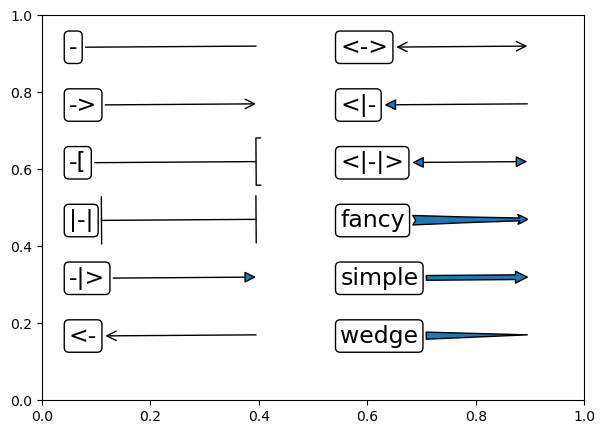

In [230]:
plt.figure(figsize=(7,5))
arrows = ['-', '->', '-[', '|-|', '-|>', '<-', '<->', '<|-', '<|-|>',
'fancy', 'simple', 'wedge']
bbox_properties=dict(
 boxstyle='round,pad=0.2',
 ec='k',
 fc='w',
 ls='-',
 lw=1
)
ofs_x = 0
ofs_y = 0

for i, ar in enumerate(arrows):
    if i == 6: ofs_x = 0.5
    plt.annotate(ar, xy=(0.4+ofs_x, 0.92-ofs_y), xycoords='data',
        xytext=(0.05+ofs_x, 0.9-ofs_y), textcoords='data', fontsize=17,
        bbox=bbox_properties,
        arrowprops=dict(arrowstyle=ar)
        )
    if ofs_y == 0.75: ofs_y = 0
    else: ofs_y += 0.15

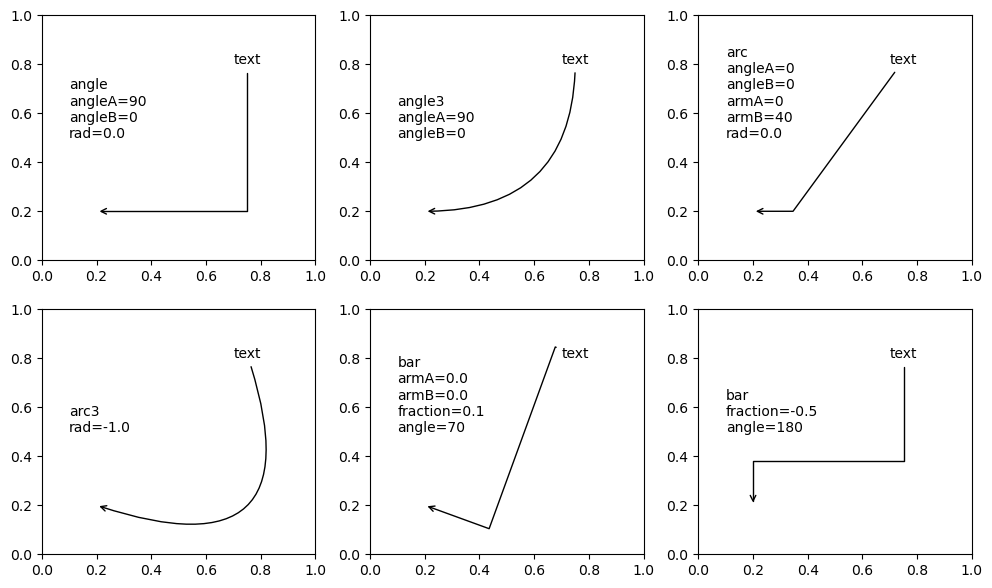

In [232]:
import math
fig, axs = plt.subplots(2, 3, figsize=(12, 7))
conn_style=[
 'angle,angleA=90,angleB=0,rad=0.0',
 'angle3,angleA=90,angleB=0',
 'arc,angleA=0,angleB=0,armA=0,armB=40,rad=0.0',
 'arc3,rad=-1.0',
 'bar,armA=0.0,armB=0.0,fraction=0.1,angle=70',
 'bar,fraction=-0.5,angle=180',
]
for i in range(2):
    for j in range(3):
       axs[i, j].text(0.1, 0.5, '\n'.join(conn_style[i*3+j].split(',')))
       axs[i, j].annotate('text', xy=(0.2, 0.2), xycoords='data',
       xytext=(0.7, 0.8), textcoords='data',
       arrowprops=dict(arrowstyle='->',
       connectionstyle=conn_style[i*3+j]))


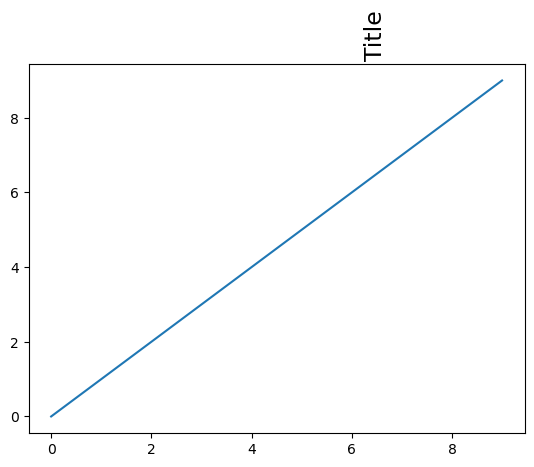

In [234]:
plt.title('Title', fontsize=17, position=(0.7, 0.2), rotation='vertical')
plt.plot(range(0,10), range(0,10))


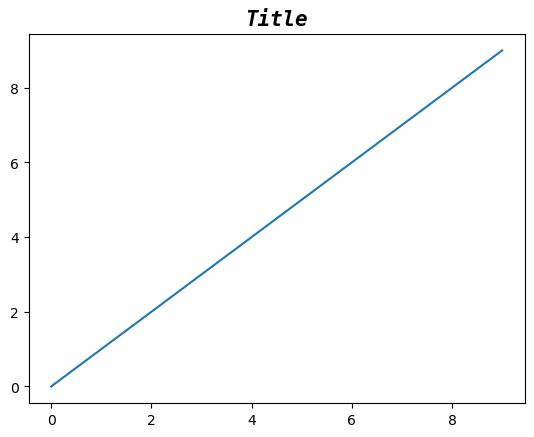

In [236]:
from matplotlib.font_manager import FontProperties
plt.title('Title', fontproperties=FontProperties(family='monospace',
style='italic', weight='heavy', size=15))
plt.plot(range(0,10), range(0,10))


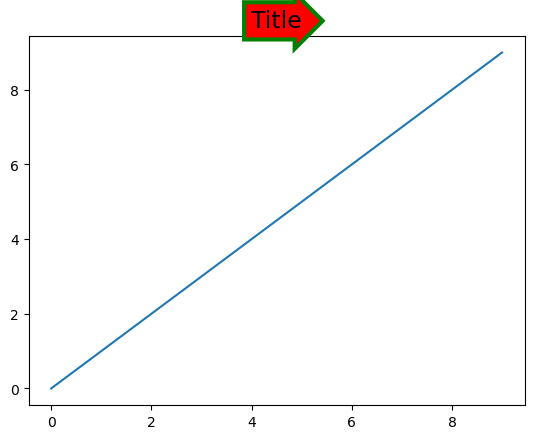

In [238]:
from matplotlib.patches import FancyBboxPatch
bbox_properties=dict(
 boxstyle='rarrow, pad=0.3',
 ec='g',
 fc='r',
 ls='-',
 lw=3
)
plt.title('Title', fontsize=17, bbox=bbox_properties, position=(0.5,
0.85))
plt.plot(range(0,10), range(0,10))

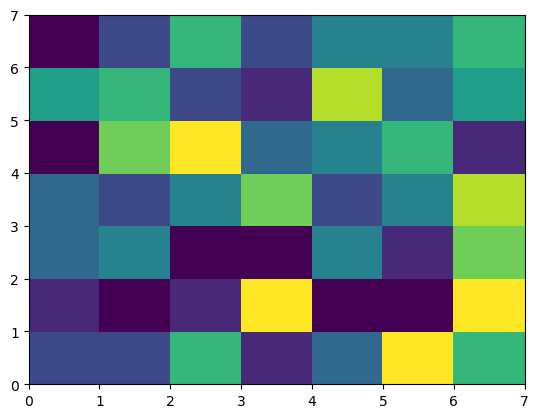

In [240]:
np.random.seed(123)
vals = np.random.randint(10, size=(7, 7))
plt.pcolor(vals)

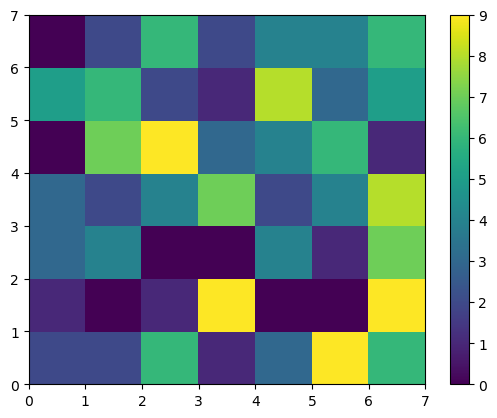

In [242]:
np.random.seed(123)
vals = np.random.randint(10, size=(7, 7))
plt.pcolor(vals)
plt.colorbar()

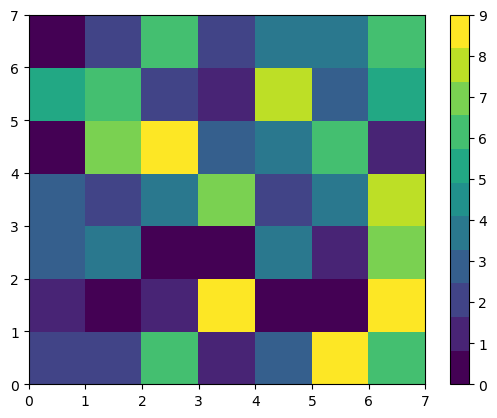

In [244]:
np.random.seed(123)
vals = np.random.randint(10, size=(7, 7))
plt.pcolor(vals, cmap=plt.get_cmap('viridis', 11) )
plt.colorbar()

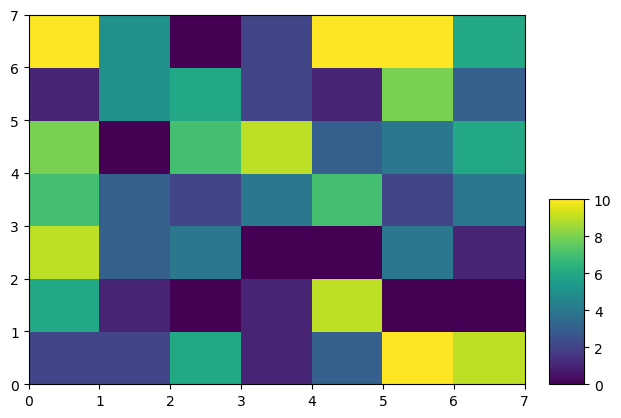

In [246]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
np.random.seed(123)
vals = np.random.randint(11, size=(7, 7))
fig, ax = plt.subplots()
gr = ax.pcolor(vals)
axins = inset_axes(ax, width="7%", height="50%", loc='lower left',
bbox_to_anchor=(1.05, 0., 1, 1), bbox_transform=ax.transAxes,
borderpad=0)
plt.colorbar(gr, cax=axins)

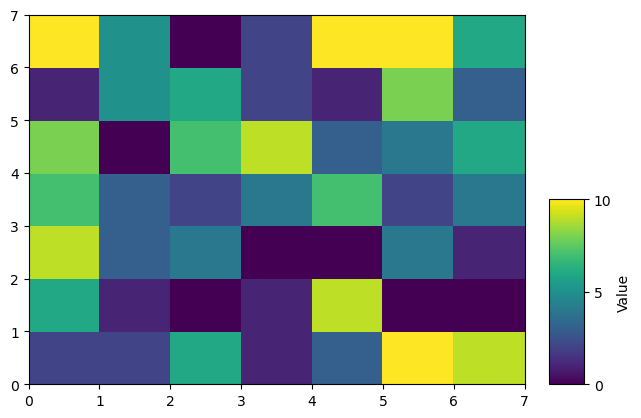

In [250]:

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
np.random.seed(123)
vals = np.random.randint(11, size=(7, 7))
fig, ax = plt.subplots()
gr = ax.pcolor(vals)
axins = inset_axes(ax, width="7%", height="50%", loc='lower left',
bbox_to_anchor=(1.05, 0., 1, 1), bbox_transform=ax.transAxes,
borderpad=0)
plt.colorbar(gr, cax=axins, ticks=[0, 5, 10], label='Value')

[Text(1, 0, 'Low'), Text(1, 5, 'Medium'), Text(1, 10, 'High')]

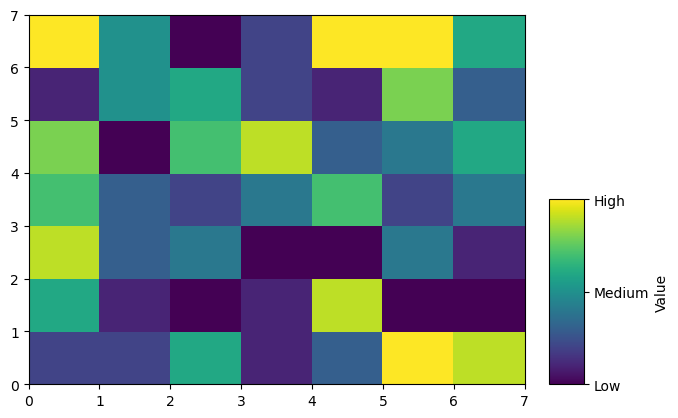

In [252]:

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
np.random.seed(123)
vals = np.random.randint(11, size=(7, 7))
fig, ax = plt.subplots()
gr = ax.pcolor(vals)
axins = inset_axes(ax, width="7%", height="50%", loc='lower left',
bbox_to_anchor=(1.05, 0., 1, 1), bbox_transform=ax.transAxes,
borderpad=0)
cbar = plt.colorbar(gr, cax=axins, ticks=[0, 5, 10], label='Value')
cbar.ax.set_yticklabels(['Low', 'Medium', 'High'])

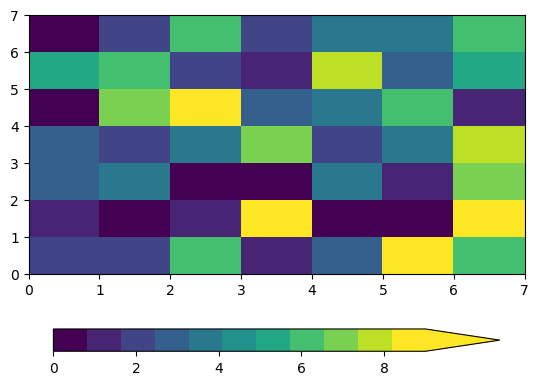

In [254]:
import numpy as np
np.random.seed(123)
vals = np.random.randint(10, size=(7, 7))
plt.pcolor(vals, cmap=plt.get_cmap('viridis', 11))
plt.colorbar(orientation='horizontal',
 shrink=0.9, extend='max', extendfrac=0.2,
 extendrect=False, drawedges=False)

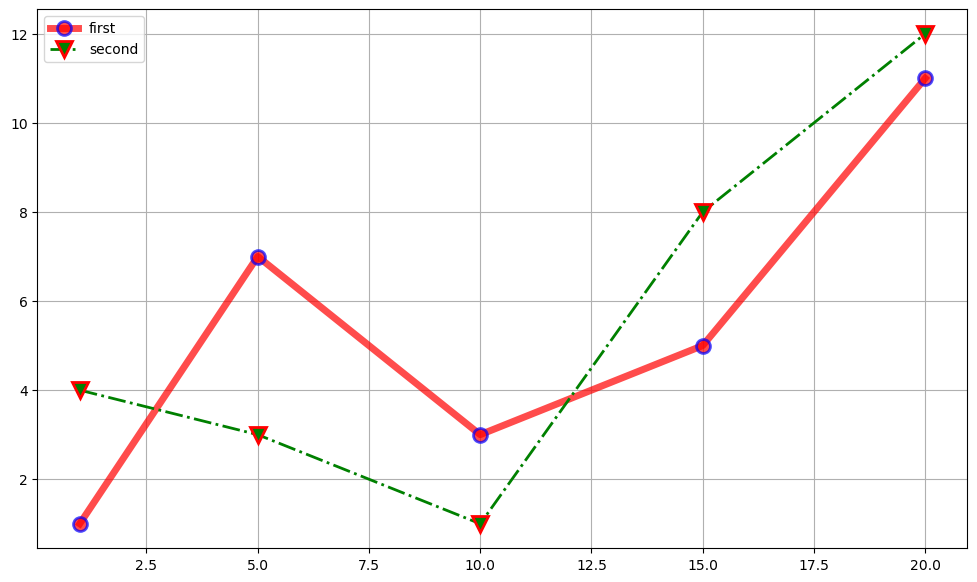

In [256]:
x = [1, 5, 10, 15, 20]
y1 = [1, 7, 3, 5, 11]
y2 = [4, 3, 1, 8, 12]
plt.figure(figsize=(12, 7))
plt.plot(x, y1, 'o-r', alpha=0.7, label='first', lw=5, mec='b', mew=2,
ms=10)
plt.plot(x, y2, 'v-.g', label='second', mec='r', lw=2, mew=2, ms=12)
plt.legend()
plt.grid(True)


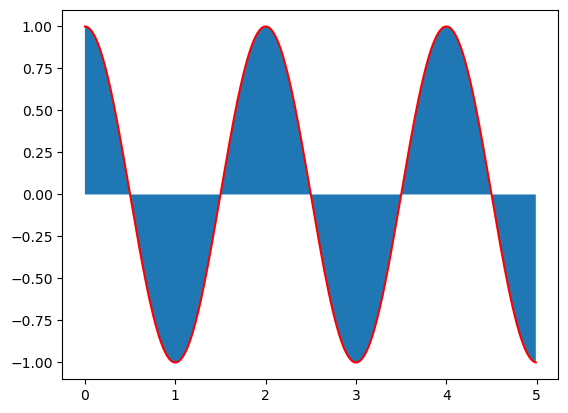

In [258]:
import numpy as np
x = np.arange(0.0, 5, 0.01)
y = np.cos(x*np.pi)
#Отобразим график с заливкой:
plt.plot(x, y, c = 'r')
plt.fill_between(x, y)

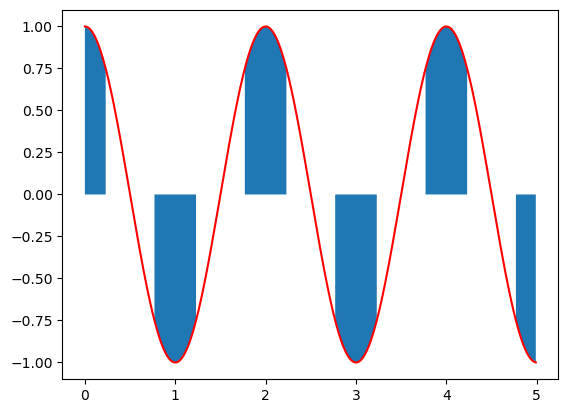

In [260]:
plt.plot(x, y, c = 'r')
plt.fill_between(x, y, where = (y > 0.75) | (y < -0.75))

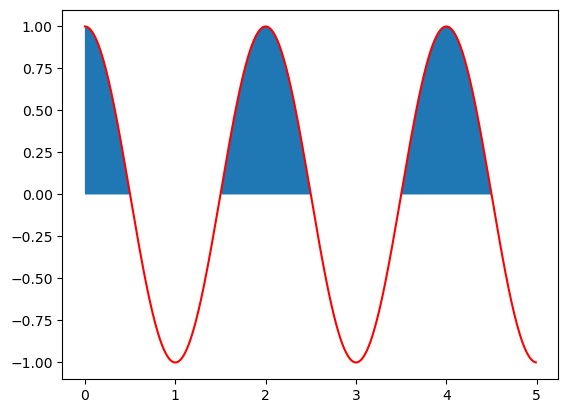

In [262]:
plt.plot(x, y, c = 'r')
plt.fill_between(x, y, where = (y > 0))

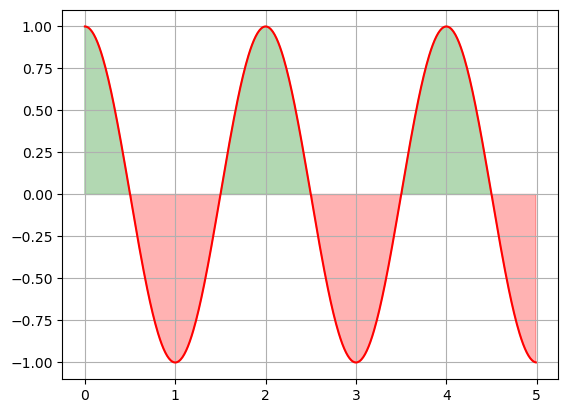

In [264]:
plt.plot(x, y, c = 'r')
plt.grid()
plt.fill_between(x, y, where=y>=0, color='g', alpha=0.3)
plt.fill_between(x, y, where=y<=0, color='r', alpha=0.3)

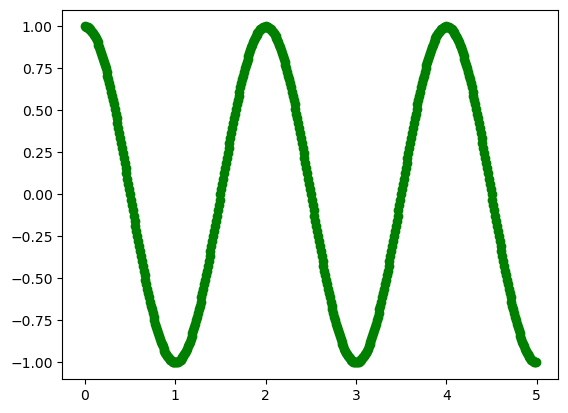

In [266]:
plt.plot(x, y, marker='o', c='g')

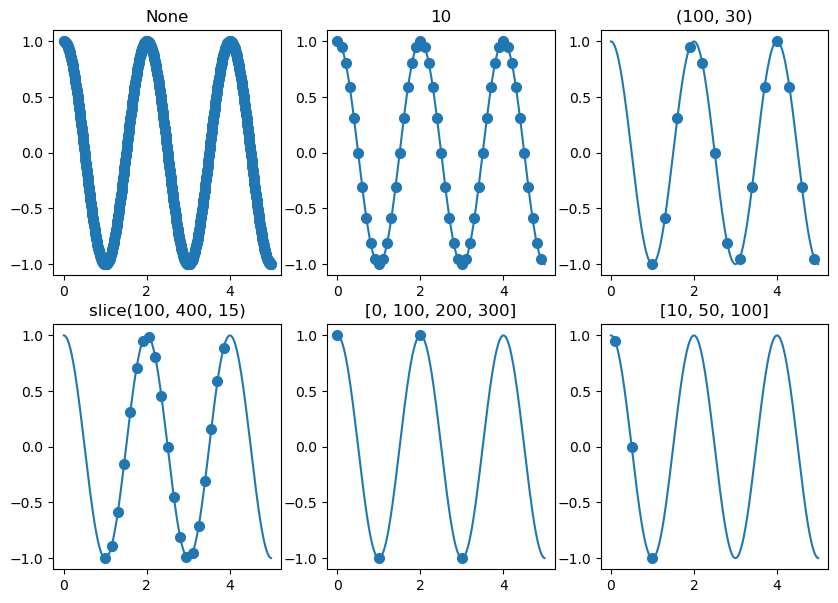

In [268]:
x = np.arange(0.0, 5, 0.01)
y = np.cos(x*np.pi)
m_ev_case = [None, 10, (100, 30), slice(100,400,15), [0, 100, 200, 300],
[10, 50, 100]]
fig, ax = plt.subplots(2, 3, figsize=(10, 7))
axs = [ax[i, j] for i in range(2) for j in range(3)]
for i, case in enumerate(m_ev_case):
   axs[i].set_title(str(case))
   axs[i].plot(x, y, 'o', ls='-', ms=7, markevery=case)


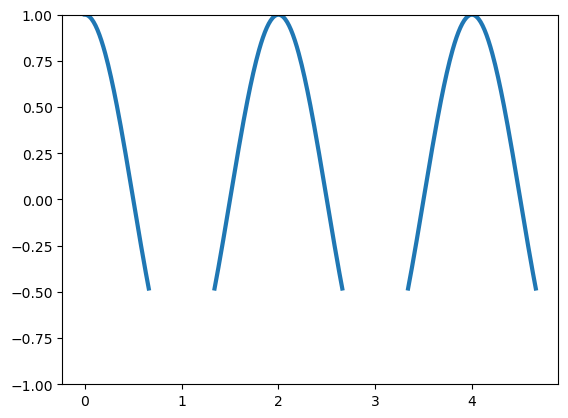

In [270]:
x = np.arange(0.0, 5, 0.01)
y = np.cos(x*np.pi)
y_masked = np.ma.masked_where(y < -0.5, y)
plt.ylim(-1, 1)
plt.plot(x, y_masked, linewidth=3)

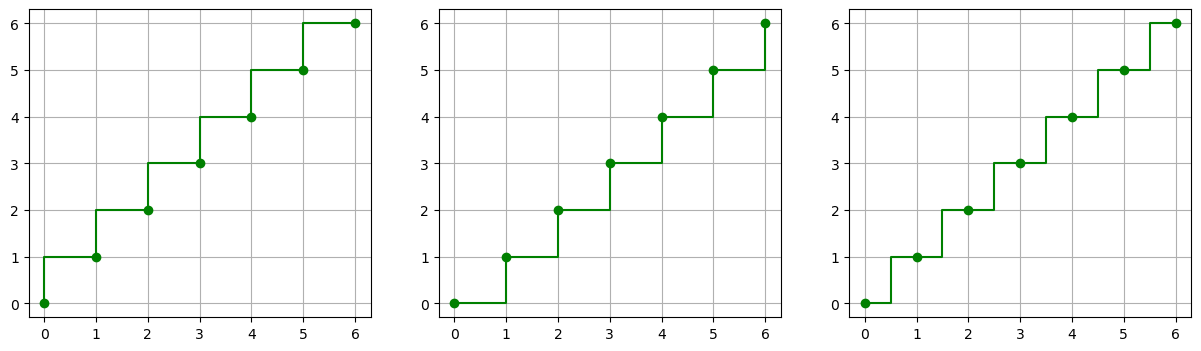

In [278]:
x = np.arange(0, 7)
y = x
where_set = ['pre', 'post', 'mid']
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
for i, ax in enumerate(axs):
 ax.step(x, y, 'g-o', where=where_set[i])
 ax.grid()

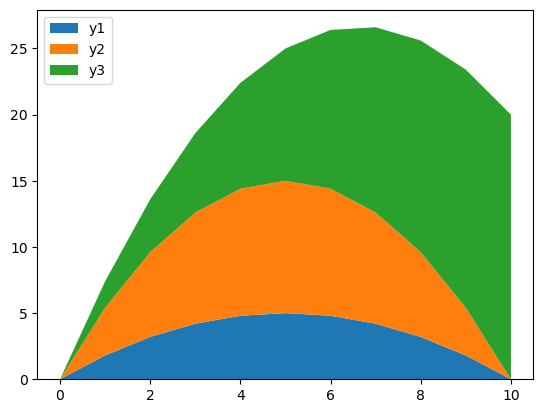

In [280]:
x = np.arange(0, 11, 1)
y1 = np.array([(-0.2)*i**2+2*i for i in x])
y2 = np.array([(-0.4)*i**2+4*i for i in x])
y3 = np.array([2*i for i in x])
labels = ['y1', 'y2', 'y3']
fig, ax = plt.subplots()
ax.stackplot(x, y1, y2, y3, labels=labels)
ax.legend(loc='upper left')

<StemContainer object of 3 artists>

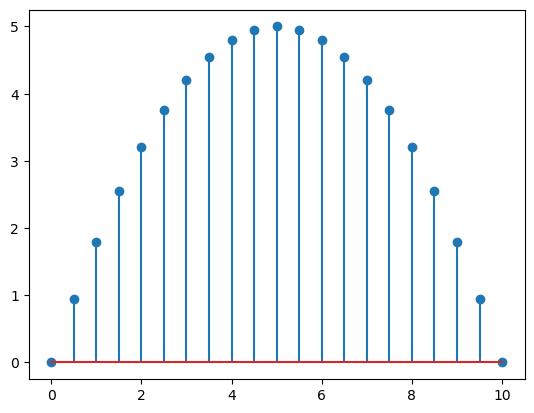

In [282]:
x = np.arange(0, 10.5, 0.5)
y = np.array([(-0.2)*i**2+2*i for i in x])
plt.stem(x, y)

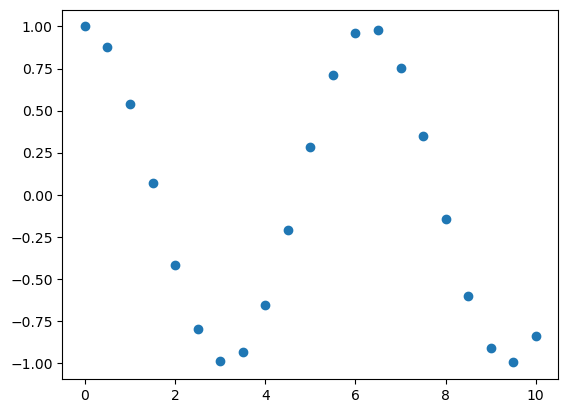

In [284]:
x = np.arange(0, 10.5, 0.5)
y = np.cos(x)
plt.scatter(x, y)

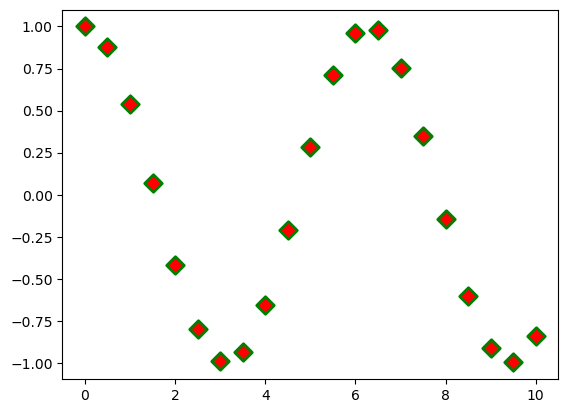

In [286]:
x = np.arange(0, 10.5, 0.5)
y = np.cos(x)
plt.scatter(x, y, s=80, c='r', marker='D', linewidths=2, edgecolors='g')


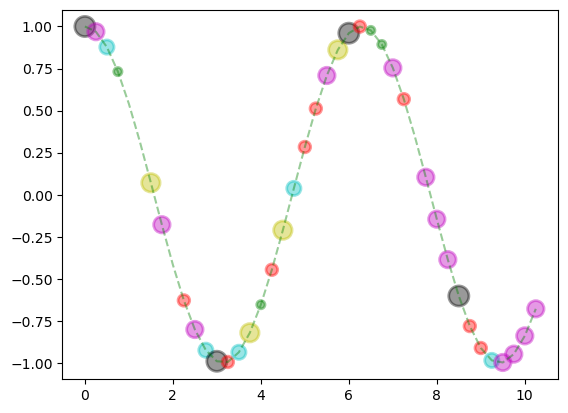

In [288]:
import matplotlib.colors as mcolors
bc = mcolors.BASE_COLORS
x = np.arange(0, 10.5, 0.25)
y = np.cos(x)
num_set = np.random.randint(1, len(mcolors.BASE_COLORS), len(x))
sizes = num_set * 35
colors = [list(bc.keys())[i] for i in num_set]
plt.scatter(x, y, s=sizes, alpha=0.4, c=colors, linewidths=2,
edgecolors='face')
plt.plot(x, y, 'g--', alpha=0.4)

<BarContainer object of 7 artists>

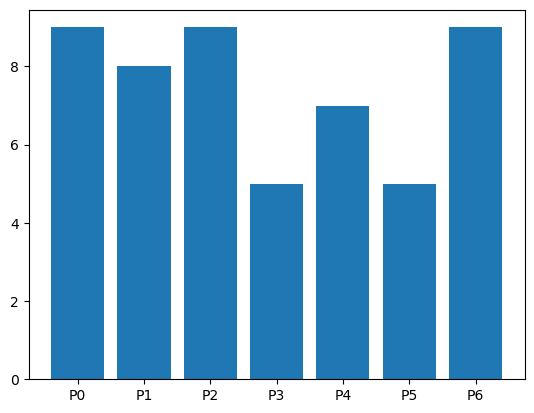

In [290]:
np.random.seed(123)
groups = [f'P{i}' for i in range(7)]
counts = np.random.randint(3, 10, len(groups))
plt.bar(groups, counts)

<BarContainer object of 7 artists>

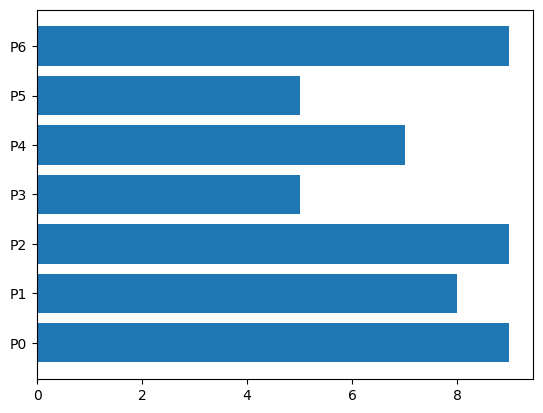

In [292]:
np.random.seed(123)
groups = [f'P{i}' for i in range(7)]
counts = np.random.randint(3, 10, len(groups))
plt.barh(groups, counts)

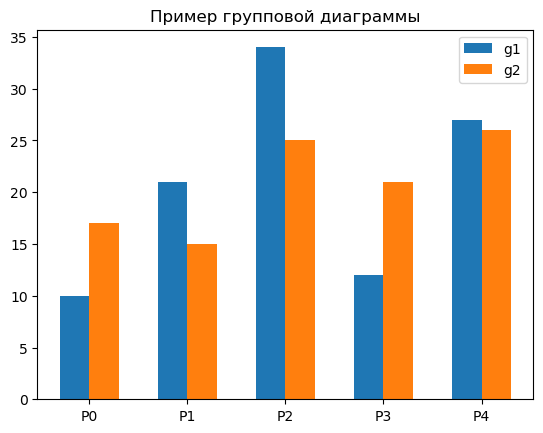

In [294]:
cat_par = [f'P{i}' for i in range(5)]
g1 = [10, 21, 34, 12, 27]
g2 = [17, 15, 25, 21, 26]
width = 0.3
x = np.arange(len(cat_par))
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, g1, width, label='g1')
rects2 = ax.bar(x + width/2, g2, width, label='g2')
ax.set_title('Пример групповой диаграммы')
ax.set_xticks(x)
ax.set_xticklabels(cat_par)
ax.legend()

<BarContainer object of 5 artists>

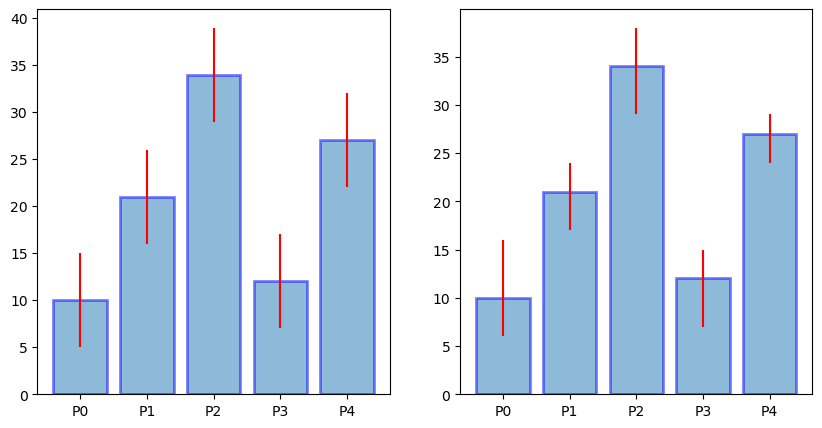

In [296]:
np.random.seed(123)
rnd = np.random.randint
cat_par = [f'P{i}' for i in range(5)]
g1 = [10, 21, 34, 12, 27]
error = np.array([[rnd(2,7),rnd(2,7)] for _ in range(len(cat_par))]).T
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].bar(cat_par, g1, yerr=5, ecolor='r', alpha=0.5, edgecolor='b',
linewidth=2)
axs[1].bar(cat_par, g1, yerr=error, ecolor='r', alpha=0.5, edgecolor='b',
linewidth=2)

(-1.09999641347429, 1.0999998292130615, -1.0999996332200421, 1.09999974471758)

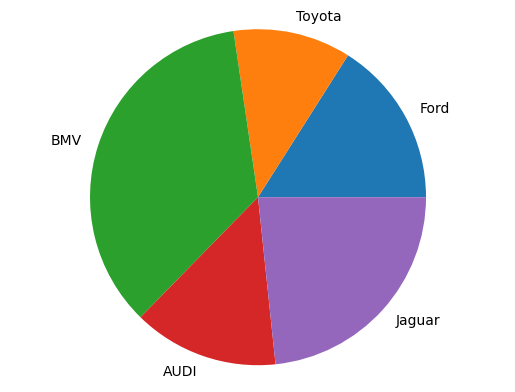

In [298]:
vals = [24, 17, 53, 21, 35]
labels = ['Ford', 'Toyota', 'BMV', 'AUDI', 'Jaguar']
fig, ax = plt.subplots()
ax.pie(vals, labels=labels)
ax.axis('equal')

(-1.2541693468510096,
 1.1991449549931066,
 -1.1017808888721372,
 1.1374061134115763)

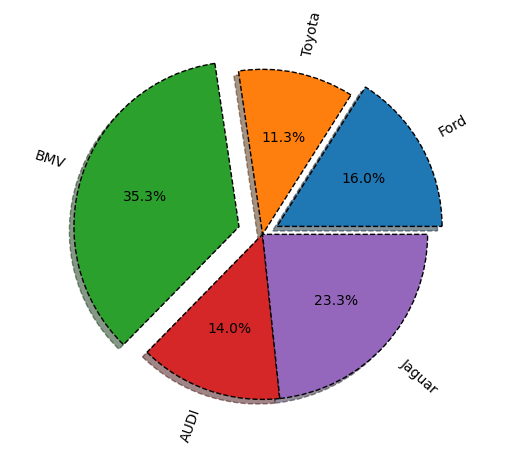

In [300]:
vals = [24, 17, 53, 21, 35]
labels = ['Ford', 'Toyota', 'BMV', 'AUDI', 'Jaguar']
explode = (0.1, 0, 0.15, 0, 0)
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%', shadow=True,
explode=explode, wedgeprops={'lw':1, 'ls':'--','edgecolor':'k'},
rotatelabels=True)
ax.axis('equal')

([<matplotlib.patches.Wedge at 0x26e60f9ff80>,
 [Text(0.646314344414094, 0.13370777166859046, ''),
  Text(0.4521935266177387, 0.48075047008298655, ''),
  Text(0.040366679721656945, 0.6587643973138266, ''),
  Text(-0.34542288787409087, 0.5623904591409097, ''),
  Text(-0.6578039053946477, 0.05379611554331286, ''),
  Text(-0.48987451889717687, -0.44229283934431896, ''),
  Text(-0.12049606360635531, -0.6489073112975174, ''),
  Text(0.39011356818311405, -0.532363976917521, ''),
  Text(0.6332653697075483, -0.1859434632601054, '')])

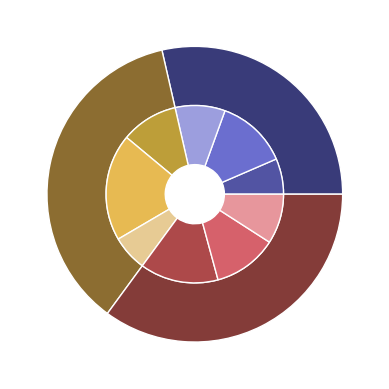

In [302]:
fig, ax = plt.subplots()
offset=0.4
data = np.array([[5, 10, 7], [8, 15, 5], [11, 9, 7]])
cmap = plt.get_cmap('tab20b')
b_colors = cmap(np.array([0, 8, 12]))
sm_colors = cmap(np.array([1, 2, 3, 9, 10, 11, 13, 14, 15]))
ax.pie(data.sum(axis=1), radius=1, colors=b_colors,
wedgeprops=dict(width=offset, edgecolor='w'))
ax.pie(data.flatten(), radius=1-offset, colors=sm_colors,
wedgeprops=dict(width=offset, edgecolor='w'))

([<matplotlib.patches.Wedge at 0x26e6223b320>,
 [Text(0.9639373540021144, 0.5299290306818474, 'Ford'),
  Text(0.22870287165240302, 1.075962358309037, 'Toyota'),
  Text(-1.046162158377023, 0.3399187231970734, 'BMV'),
  Text(-0.3617533684721028, -1.0388139873909512, 'AUDI'),
  Text(0.8174592712713289, -0.7360437078139777, 'Jaguar')])

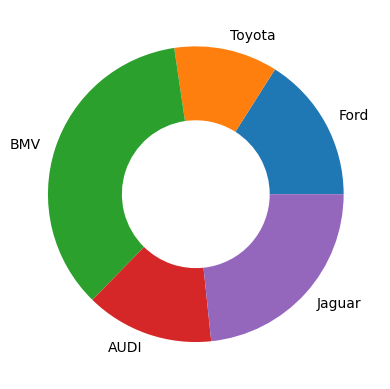

In [304]:
vals = [24, 17, 53, 21, 35]
labels = ['Ford', 'Toyota', 'BMV', 'AUDI', 'Jaguar']
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, wedgeprops=dict(width=0.5))

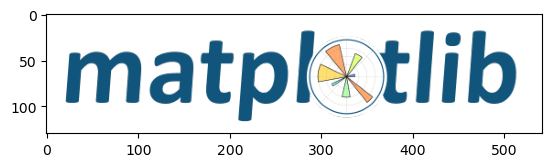

In [306]:
from PIL import Image
import requests
from io import BytesIO
response = requests.get('https://matplotlib.org/_static/logo2.png')
img = Image.open(BytesIO(response.content))
plt.imshow(img)


In [308]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

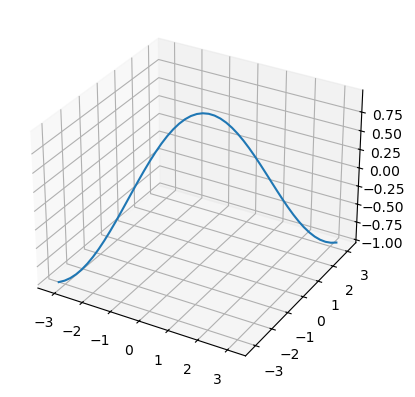

In [310]:
x = np.linspace(-np.pi, np.pi, 50)
y = x
z = np.cos(x)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, label='parametric curve')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


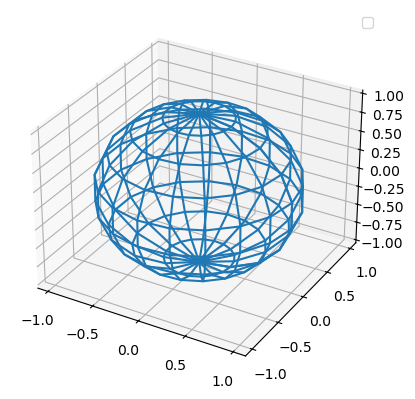

In [314]:
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(x, y, z)
ax.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


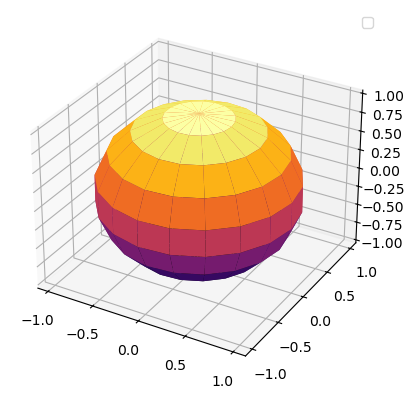

In [316]:
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='inferno')
ax.legend()
